<a href="https://colab.research.google.com/github/rsobieski/Reinforcement-Learning-prezentacja/blob/main/Reinforcement_Learning_optymalizacja_strategii_inw_10_04_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Przygotowanie ≈õrodowiska

In [6]:
# Przygotowanie ≈õrodowiska
!pip install stable-baselines3[extra]
!pip install gymnasium
!pip install shimmy
!pip install yfinance

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [1]:
# przygotowanie bazowych danych na potrzebƒô prezentacji.
# do prezentacji wykorzystam cenƒô akcji AAPL

import yfinance as yf
import pandas as pd

def get_aapl_data(start_date="2022-01-01", end_date="2023-01-01"):
    """
    Pobiera dane historyczne AAPL (Apple) z serwisu yfinance
    w podanym okresie. Zwraca DataFrame z kolumnƒÖ 'Close' i indeksowanƒÖ datami.
    """
    df_raw = yf.download("AAPL", start=start_date, end=end_date, progress=False)

    # tylko cena 'Close'
    if "Close" not in df_raw.columns:
        raise ValueError("Brak kolumny 'Close' w pobranych danych.")

    df = df_raw[["Close"]].copy()

    # szereg - sortowane po dacie
    df.sort_index(inplace=True)

    return df

some_financial_data = get_aapl_data(
    start_date="2024-01-01",
    end_date="2025-04-09"
)

print(some_financial_data.head(10))
print(some_financial_data.tail(10))


YF.download() has changed argument auto_adjust default to True
Price            Close
Ticker            AAPL
Date                  
2024-01-02  184.532089
2024-01-03  183.150391
2024-01-04  180.824356
2024-01-05  180.098694
2024-01-08  184.452560
2024-01-09  184.035080
2024-01-10  185.078812
2024-01-11  184.482391
2024-01-12  184.810425
2024-01-16  182.534073
Price            Close
Ticker            AAPL
Date                  
2025-03-26  221.529999
2025-03-27  223.850006
2025-03-28  217.899994
2025-03-31  222.130005
2025-04-01  223.190002
2025-04-02  223.889999
2025-04-03  203.190002
2025-04-04  188.380005
2025-04-07  181.460007
2025-04-08  172.419998


# **Reinforcement Learning w optymalizacji strategii inwestycyjnych**





---



## **1. Kilka s≈Ç√≥w o rynkach finansowych**


Rynki finansowe od strony danych to skomplikowana struktura, kt√≥ra reaguje na niezliczone bod≈∫ce i potrafi zaskoczyƒá nawet najbardziej do≈õwiadczonych trader√≥w. Budowa modeli inwestycyjnych w takim ≈õrodowisku to zadanie wyjƒÖtkowo z≈Ço≈ºone ‚Äì trzeba uwzglƒôdniƒá zar√≥wno dane finansowe, zmienno≈õƒá, niestacjonarno≈õƒá, a tak≈ºe emocje i zachowania uczestnik√≥w rynku.

Przez d≈Çugi czas modele dla rynk√≥w finansowych by≈Çy budowane w oparciu o modele regresyjne, metody predykcji szereg√≥w czasowych (np. ARIMA, GARCH) czy modele faktorowe (analizujƒÖce g≈Ç√≥wne czynniki napƒôdzajƒÖce ceny).

Akutalnie jednym z bazowych technik wykorzystywanych przez szybkie modele sƒÖ np. Random Forest czy boosting (XGBoost, LightGBM), kt√≥re skutecznie radzƒÖ sobie z du≈ºƒÖ liczbƒÖ cech i niestandardowymi relacjami.




### **1.1. Model naiwny**

Jak  du≈ºym wyzwaniem jest przygotowanie modelu, jest pr√≥ba pobicia modelu naiwnego. W uproszczeniu jego dzia≈Çanie polega na tym, ≈ºe aktualna cena to cena z poprzedniego okresu.

Formalny zapis:


\begin{align}
        \hat{y}_{t+1} = y_t
    \end{align}

Nie bƒôdziemy wchodzi w temat szereg√≥w czasowych, ale kr√≥tka prezentacja dzia≈Çania modelu znajduje siƒô poni≈ºej. Widaƒá na wykresie, ≈ºe model nawiny podƒÖ≈ºa za podstawoƒÖ warto≈õciƒÖ (cena zamkniƒôcia).

[*********************100%***********************]  1 of 1 completed


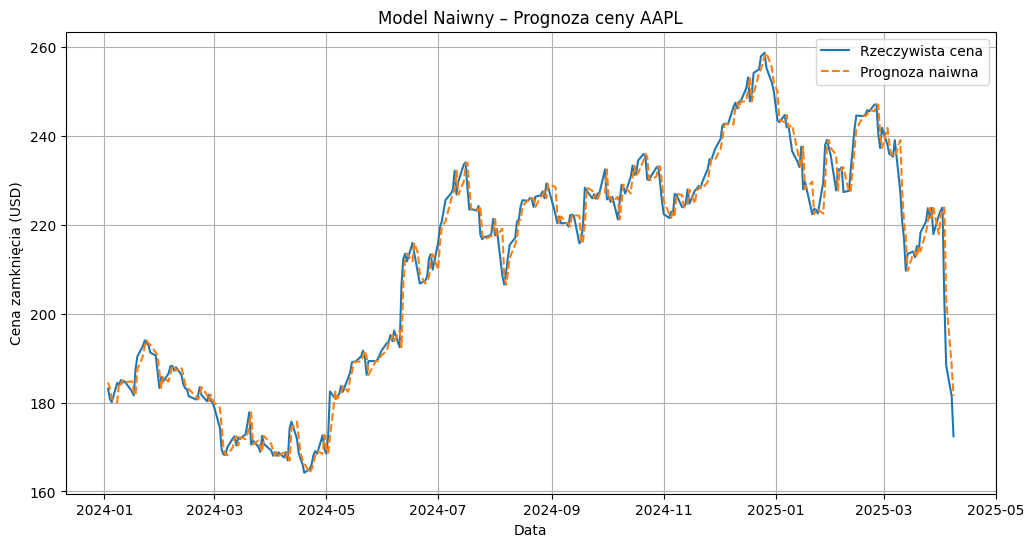

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Pobieranie aktualnej wyceny akcji apple
data = yf.download("AAPL", start="2024-01-01", end="2025-04-09")
prices = data['Close']

# predykcja z modelem naiwnym
naive_pred = prices.shift(1)  # przewidujemy, ≈ºe cena dzisiaj = cena wczoraj
prices = prices[1:]
naive_pred = naive_pred[1:]

plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label="Rzeczywista cena")
plt.plot(naive_pred.index, naive_pred, label="Prognoza naiwna", linestyle='--')
plt.title("Model Naiwny ‚Äì Prognoza ceny AAPL")
plt.xlabel("Data")
plt.ylabel("Cena zamkniƒôcia (USD)")
plt.legend()
plt.grid(True)
plt.show()


Model nawiny czƒôsto stosowany jest jako bazowy model (punkt odniesienia) dla modeli budowanych w oparciu o szeregi czasowe czy regresjƒô liniowƒÖ.

> üîó Wiƒôcej o modelu naiwnym: [Na√Øve method](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)

###  **1.2. Reinforcement Learning**

Wspomniany wy≈ºej model naiwny w zestawieniu z r√≥≈ºnymi technikami dot. predycji czasowej czy modeli regresyjnych pokazujƒÖ jakƒÖ trudno≈õƒá majƒÖ te modele z uchwyceniem dynamicznej natury rynku i ciƒÖg≈Çego podejmowania decyzji w czasie. W≈Ça≈õnie tutaj do gry wchodzi Reinforcement Learning (RL) ‚Äì podej≈õcie, w kt√≥rym model (agent) uczy siƒô poprzez interakcjƒô ze ≈õrodowiskiem, w tym przypadku z rynkiem czy symulacjƒÖ rynku.

RL dostarcza agentowi mechanizmu ‚Äûnagr√≥d‚Äù i ‚Äûkar‚Äù, dziƒôki kt√≥rym mo≈ºe z czasem ewoluowaƒá w coraz skuteczniejszego ‚Äûtradera‚Äù czy zarzƒÖdzajƒÖcego portfelem.



---



## **2. Podstawy RL na prostych przyk≈Çadach**

### **2.1. Co to jest Reinforcement Learning?**


Reinforcement Learning (uczenie przez wzmacnianie) to dziedzina sztucznej inteligencji, w kt√≥rej agent (algorytm) uczy siƒô optymalnego dzia≈Çania w pewnym ≈õrodowisku (np. rynku finansowym, grze komputerowej), podejmujƒÖc akcje i otrzymujƒÖc za nie nagrody.

* **Agent** to podmiot uczƒÖcy siƒô (np. algorytm podejmujƒÖcy decyzje).
* **≈örodowisko** to wszystko, z czym agent wchodzi w interakcjƒô (np. dane rynkowe, zasady gry).
* **Akcje** to mo≈ºliwe decyzje podejmowane przez agenta (np. kupno, sprzeda≈º).
* **Stany** (obserwacje) to informacje o aktualnej sytuacji w ≈õrodowisku (np. obecny kurs akcji).
* **Nagroda** to sygna≈Ç, czy dana akcja w okre≈õlonym stanie przynios≈Ça korzy≈õƒá (np. zysk) czy stratƒô.











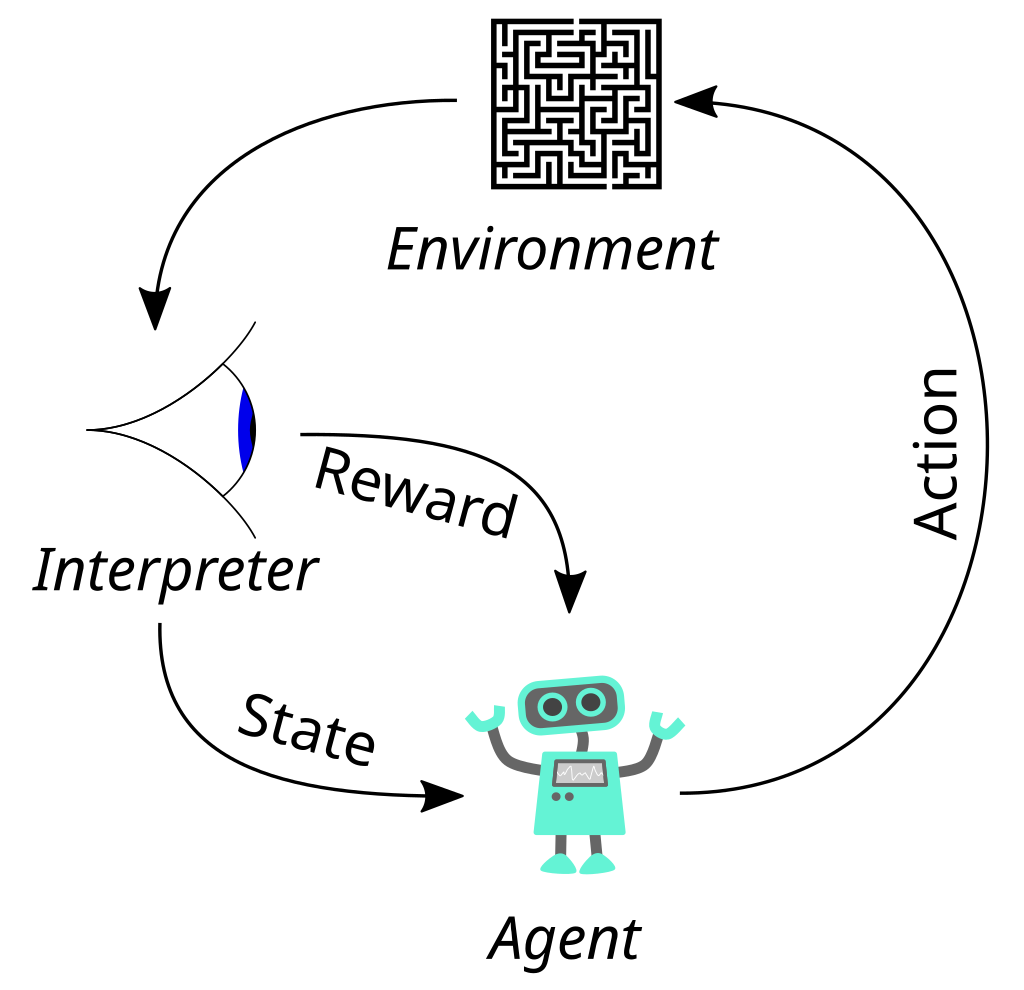

> üîóWikipedia-> [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning)

### **2.2. Por√≥wnanie z innymi rodzajami uczenia**

**Uczenie nadzorowane (supervised)**

Mamy gotowe przyk≈Çady z poprawnƒÖ odpowiedziƒÖ (np. zdjƒôcia kot√≥w i ps√≥w z etykietƒÖ ‚Äûkot‚Äù lub ‚Äûpies‚Äù).

Model uczy siƒô rozpoznawaƒá wzorce, aby na nowe dane odpowiedzieƒá jak najbardziej poprawnie.

**Uczenie nienadzorowane (unsupervised)**

Nie mamy etykiet ani odpowiedzi ‚Äì model sam szuka ukrytych struktur w danych (np. grupuje klient√≥w wed≈Çug zachowa≈Ñ zakupowych).

**Uczenie przez wzmacnianie (RL)**

Nie mamy bezpo≈õrednio ‚Äûpoprawnych odpowiedzi‚Äù dla ka≈ºdego przyk≈Çadu.

Agent eksperymentuje w ≈õrodowisku, a w zamian otrzymuje nagrodƒô (lub karƒô) zale≈ºnƒÖ od swoich dzia≈Ça≈Ñ.

Celem jest maksymalizacja ca≈Çkowitej nagrody w d≈Çu≈ºszym okresie.


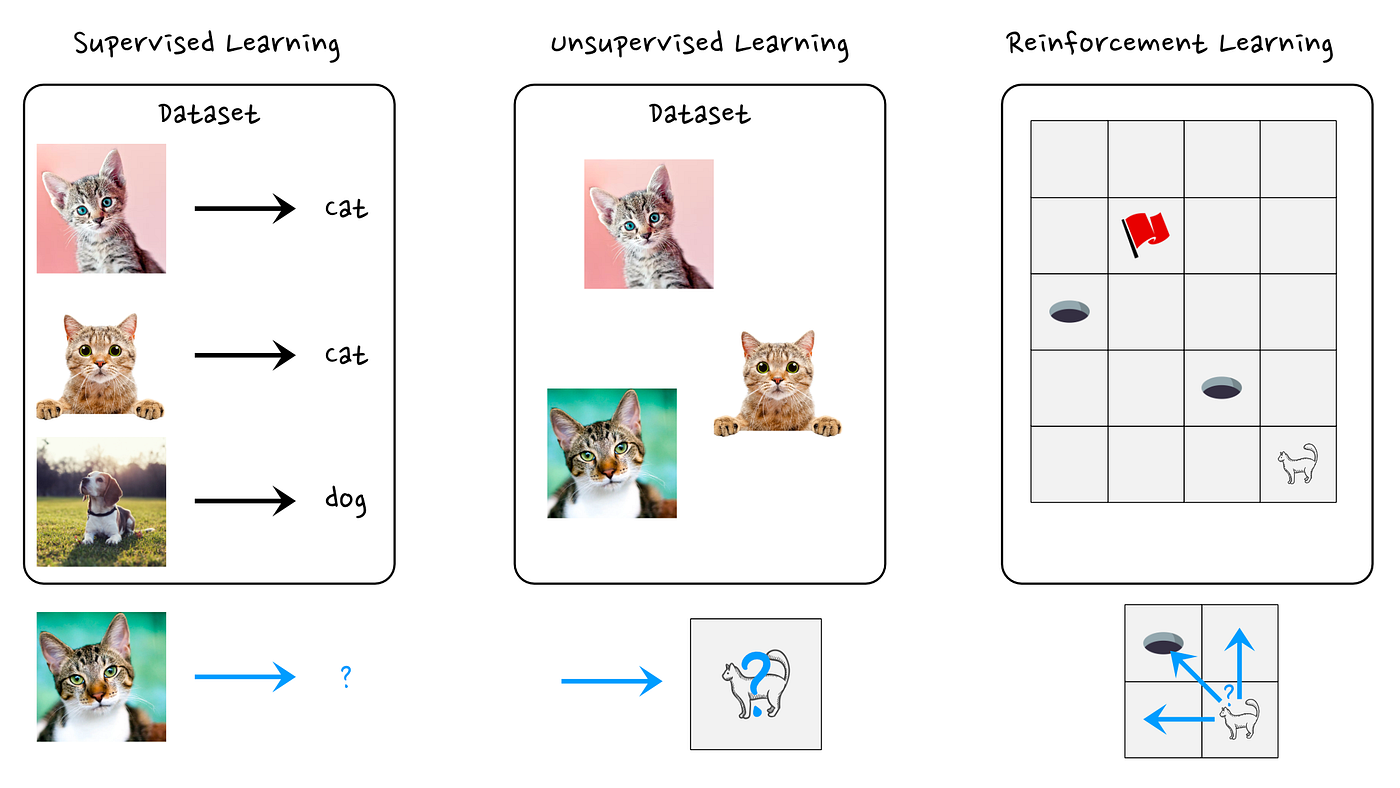

> üîóMedium -> [Reinforcement Learning: An introduction](https://medium.com/@cedric.vandelaer/reinforcement-learning-an-introduction-part-1-4-866695deb4d1)

### **2.3. Przyk≈Çad RL w realnym ≈õrodowisku**

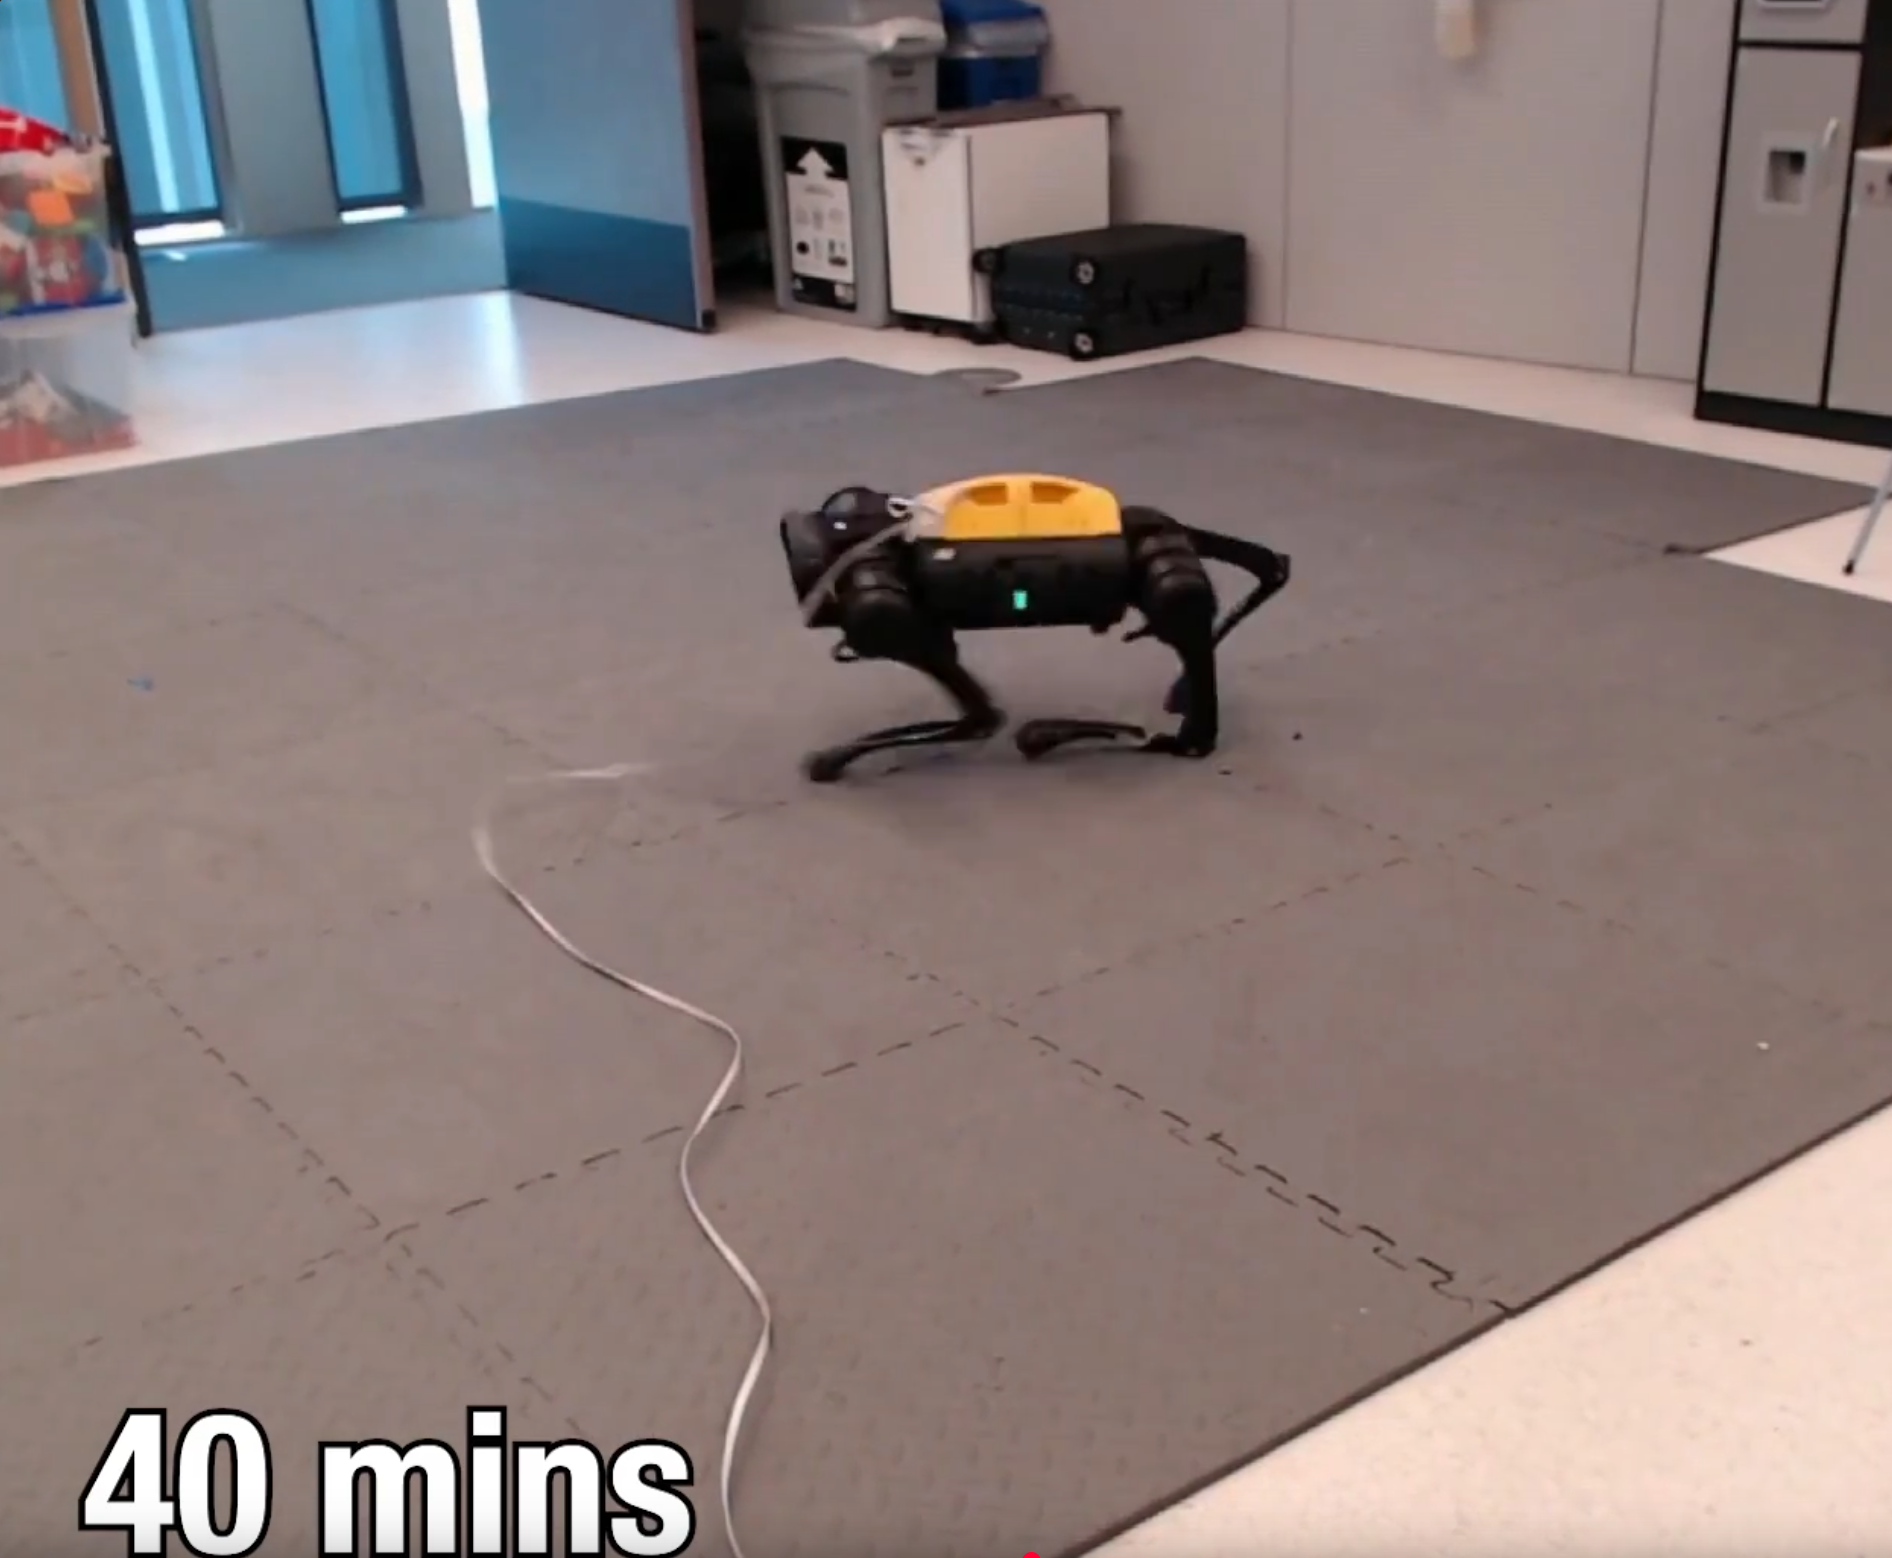

[Learning to Walk in the Real World in 1 Hour (No Simulator)](https://www.youtube.com/watch?v=xAXvfVTgqr0)

Link do prezentowanego projektu: (https://danijar.com/project/daydreamer/)



---



## **3. RL w finansach - problemy i wyzwania**

Rynek finansowy ze zwzglƒôdu na swojƒÖ charakterystykƒô jest trudnym zestawem danych do trenowania modeli RL. Kilka kluczowych problem√≥w i wyzwa≈Ñ, ale tak≈ºe zastosowa≈Ñ przedstawiam poni≈ºej.

### **3.1. Niestacjonarno≈õƒá rynku**

Rynki finansowe podlegajƒÖ ciƒÖg≈Çym, czƒôsto trudnym do przewidzenia zmianom. PojawiajƒÖ siƒô nowe informacje, zmieniajƒÖ siƒô stopy procentowe, panujƒÖ odmienne nastroje inwestor√≥w, na cenƒô majƒÖ bezpo≈õredni wp≈Çyw trudne do przewidzenia wydarzenia. W konsekwencji statystyczne w≈Ça≈õciwo≈õci danych (np. ≈õrednia, wariancja, korelacje miƒôdzy aktywami) nie sƒÖ sta≈Çe w czasie (concept drift), a ≈õrodowisko w jakim pracujemy przy ka≈ºdej iteracji mo≈ºe mieƒá inne kluczowe cechy.

**Wp≈Çyw na RL:**

Agent musi na bie≈ºƒÖco przystosowywaƒá siƒô do nowych warunk√≥w (mo≈ºe wymagaƒá czƒôstego retrainingu). Model wytrenowany na historycznych danych mo≈ºe szybko traciƒá trafno≈õƒá, gdy wejdziemy w nowy re≈ºim rynkowy.

Modele statyczne (np. klasyczne modele regresyjne) majƒÖ tendencjƒô do ‚Äûrozjazdu‚Äù w czasie; RL mo≈ºe pr√≥bowaƒá to kompensowaƒá poprzez ciƒÖg≈ÇƒÖ adaptacjƒô.

**Czarne ≈Çabƒôdzie, czyli nag≈Çe zmiany re≈ºimu rynkowego:**

* **Kryzys subprime z 2008** ‚Äì relacje miƒôdzy klasami aktyw√≥w diametralnie siƒô zmieni≈Çy.

* **Pandemia COVID-19** ‚Äì nieoczekiwana zmienno≈õƒá i luki cenowe w marcu 2020.

* **Zmiany polityki bank√≥w centralnych** ‚Äì wp≈ÇywajƒÖce na wyceny obligacji i walut.

* **C≈Ça Trumpa** - wp≈Çyw na wyceny wiƒôkszo≈õci aktyw√≥w (obligacji, akcji, surowc√≥w, walut) oraz wp≈Çyw na dane makroekonomiczne.


Skutki tych zmian maja bardzo du≈ºy wp≈Çyw na strategie przyjmowane przez modele modele RL, dlatego modele takie wyamagajƒÖ czƒôstej adaptacji oraz sotoswania dedykowanych technik adaptacyjnych

**Retrain (ponowne uczenie):**

Agent powinien mieƒá mo≈ºliwo≈õƒá regularnego aktualizowania parametr√≥w na najnowszych danych (np. co tydzie≈Ñ, co miesiƒÖc). Dziƒôki temu powstaje ‚Äûmodel przesuwajƒÖcego siƒô okna‚Äù (rolling window), gdzie nowa partia danych jest do≈ÇƒÖczana do treningu, a najstarsza jest usuwana.

**Adaptacyjne strategie:**

JednƒÖ z technik jest w≈ÇƒÖczanie do modelu mechanizmy wykrywania zmiany re≈ºimu (tzw. regime switching) lub wykorzystujƒÖ meta-learning, by szybciej przystosowaƒá siƒô do nietypowych warunk√≥w.

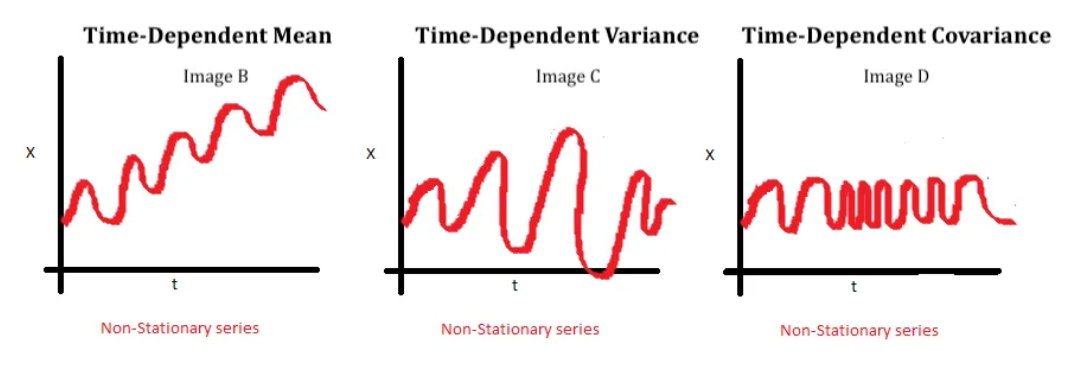

> üîóMedium -> [Understanding Stationarity vs. Non-Stationarity in Financial Markets](https://medium.com/@seattle_4296/in-5-minutes-understanding-stationarity-vs-non-stationarity-in-financial-markets-f7339717f5c5)

### **3.2.  Reward sparsity - Niewielka czƒôstotliwo≈õƒá ‚Äûnagr√≥d‚Äù**

**Czym jest nagroda w RL?**

W finansach typowƒÖ nagrodƒÖ mo≈ºe byƒá zysk lub strata z pozycji, ewentualnie okre≈õlona funkcja (np. Sharpe Ratio, penalizowanie drawdownu). Jednak faktyczna realizacja (zysk/strata) ujawnia siƒô rzadko i zale≈ºy od wielu czynnik√≥w zewnƒôtrznych.

**Dlaczego to problem?**

W klasycznych zadaniach RL (np. proste gry) agent dostaje nagrodƒô niemal po ka≈ºdym ruchu. W inwestycjach feedback jest odleg≈Çy w czasie (np. dopiero po zamkniƒôciu pozycji - pod koniec epizodu rynkowego). Dla agenta oznacza to, ≈ºe przez d≈Çugi okres mo≈ºe nie otrzymywaƒá wyra≈∫nych sygna≈Ç√≥w, czy dzia≈Ça poprawnie.

Dodatkowo pomiƒôdzy akcjƒÖ a nagrodƒÖ mogƒÖ nastƒÖpic inne akcje o przeciwnym znaczenie. Mo≈ºemy te≈º mieƒá rozciƒÖgniƒôte w czasie skutki jednej decyzji (kupno akcji i trzymanie jej przez d≈Çu≈ºszy okres, zwiƒôkszanie lub zmniejszanie pozycji).

**Strategie pracy z RL**

Ze wzglƒôdu na charektrystykƒô rynku finansowego model RL i brak czƒôstych informacji zwrotnych, trenowanie modelu jest utrudnione i wymaga zastosowania specjalnych strategii. Kilka prostych przyk≈Çad√≥w:

* **Zastosowanie shapingu nagrody** zamiast czekaƒá na finalny zysk, mo≈ºna naliczaƒá mniejsze nagrody w trakcie (np. dzienny przyrost warto≈õci portfela).
* **Sharpe Ratio** zamiast u≈ºywaƒá surowego zysku, mo≈ºna nagradzaƒá agenta za uzyskiwanie stabilnych st√≥p zwrotu, gdzie wa≈ºnym czynnikiem jest zmienno≈õƒá.
Sharpe Ratio promuje strategie z wy≈ºszƒÖ ≈õredniƒÖ stopƒÖ zwrotu przy mniejszej zmienno≈õci.
* **Uzupe≈ÇniajƒÖce sygna≈Çy** Kary za wysokie koszty transakcyjne, du≈ºƒÖ liczbƒô operacji w kr√≥tkim czasie albo zbyt du≈ºe obsuniƒôcie kapita≈Çu (drawdown).

Dziƒôki temu agent nie jest zostawiony wy≈ÇƒÖcznie z ‚ÄûnagrodƒÖ ko≈ÑcowƒÖ‚Äù, ale otrzymuje czƒôstsze wskaz√≥wki, kt√≥re kierujƒÖ go do w≈Ça≈õciwych decyzji.



### **3.3. Zastosowania: Dynamiczna alokacja portfela**

Agent RL w ka≈ºdym kroku decyzyjnym wybiera, w jaki spos√≥b dzieliƒá kapita≈Ç pomiƒôdzy r√≥≈ºne aktywa (akcje, obligacje, ETF-y, surowce itp.). Mo≈ºe to byƒá podej≈õcie dyskretne (‚Äûkup/sprzedaj/utrzymaj‚Äù) lub ciƒÖg≈Çe (wyb√≥r udzia≈Çu w [‚àí1,+1] dla ka≈ºdego aktywa).

**Korzy≈õci:**

Mo≈ºliwo≈õƒá adaptacji do zmieniajƒÖcych siƒô korelacji miƒôdzy aktywami.

Uczenie siƒô ‚Äûco dzia≈Ça‚Äù na danym rynku ‚Äì zw≈Çaszcza w okre≈õlonych re≈ºimach (np. hossa/spadki).

**Wyzwania:**

Du≈ºa zmienno≈õƒá i ryzyko overfittingu.

Konieczno≈õƒá korzystania z risk management w funkcji nagrody (np. ograniczenie maksymalnego drawdownu).

### **3.4. Zastosowania: Strategie arbitra≈ºowe**

Wyszukiwanie kr√≥tkotrwa≈Çych nieefektywno≈õci (np. r√≥≈ºnic cen na powiƒÖzanych instrumentach) i automatyczne zawieranie transakcji kompensujƒÖcych.

RL mo≈ºe siƒô okazaƒá skuteczne w wychwytywaniu czƒôstych, acz niewielkich okazji, gdzie stawka jest du≈ºa (ryzyko, koszty transakcyjne, timing).

**Zalety:**

Automatyzacja proces√≥w w czasie bliskim rzeczywistemu (HFT ‚Äì High Frequency Trading).

Mo≈ºliwo≈õƒá ciƒÖg≈Çego ‚Äûdokszta≈Çcania‚Äù modelu przy zmianach warunk√≥w rynkowych.

**Ograniczenia:**

Bardzo kr√≥tki czas decyzyjny ‚Äì w HFT liczƒÖ siƒô mikrosekundy. Modele RL mogƒÖ wymagaƒá dedykowanego sprzƒôtu (hardware acceleration).

Konieczno≈õƒá ultra-precyzyjnej in≈ºynierii danych (tick data, order book data).

### **3.5. Zastosowania: ZarzƒÖdzanie ryzykiem**

Czyste maksymalizowanie zysku mo≈ºe prowadziƒá do bardzo ryzykownych decyzji (np. du≈ºa d≈∫wignia).

Dlatego kluczowe jest, aby agent wziƒÖ≈Ç pod uwagƒô ryzyko w procesie decyzyjnym.

**Value-at-Risk (VaR)**

Definicja: VaR na poziomie np. 95% (kwantyl rozk≈Çadu strat 5%) m√≥wi, ≈ºe z prawdopodobie≈Ñstwem 95% strata nie przekroczy pewnej kwoty (w ustalonym horyzoncie, np. dziennym).

Mo≈ºemy ukaraƒá agenta za przekraczanie okre≈õlonego VaR. Wp≈Çywa to na politykƒô podejmowania decyzji (agent nie podejmie zbyt ryzykownych transakcji).

RL mo≈ºe aktywnie modyfikowaƒá pozycje, by utrzymaƒá straty w ryzach. Przyk≈Çadowo ‚Äì je≈ºeli obecna ekspozycja zbli≈ºa siƒô do dopuszczalnych limit√≥w VaR, agent ogranicza wielko≈õƒá pozycji.

**Conditional Value-at-Risk (CVaR)**

Rozszerzenie VaR: pokazuje ≈õredniƒÖ stratƒô w sytuacjach, gdy przekroczony zostanie pr√≥g VaR. Tzw. Expected Shortfall ‚Äì ≈õrednia wielko≈õƒá straty, je≈õli ju≈º znajdziemy siƒô poza VaR.

Mo≈ºna w≈ÇƒÖczyƒá CVaR do funkcji nagrody lub wprowadziƒá dodatkowe ograniczenie. Daje to bardziej konserwatywne strategie, chroniƒÖce przed "ryzykuem ogona rozk≈Çadu" (tail risk).

**Korzy≈õci:**

Mo≈ºliwo≈õƒá uwzglƒôdnienia poziomu ryzyka w samej definicji nagrody (np. kara za przekroczenie VaR > X).

Stosowanie w portfelach stricte nastawionych na ochronƒô kapita≈Çu przy ustalonym poziomie stopy zwrotu (np. fundusze typu risk parity).

Monitoring w czasie rzeczywistym - nawet najlepiej wytrenowany agent wymaga kontroli, czy nie generuje nadmiernych strat przy zmianie warunk√≥w rynkowych.

**Trudno≈õci:**

Dok≈Çadna estymacja VaR/CVaR w warunkach szybkich zmian rynkowych bywa trudna do okre≈õlenia.

Dane ekstremalne (czarne ≈Çabƒôdzie) mogƒÖ zniekszta≈Çciƒá wycenƒô ryzyka.



---



## **4. ≈örodowiska i biblioteki do RL**

### **4.1. Gym/Gymnasium: standardowe interfejsy RL**

To biblioteka (wcze≈õniej rozwijana pod nazwƒÖ OpenAI Gym, obecnie oficjalnie wspierana jako Gymnasium przez organizacjƒô Farama Foundation) zapewniajƒÖca standardowy interfejs do zada≈Ñ Reinforcement Learning.

Udostƒôpnia zestaw ≈õrodowisk (np. gry Atari, zadania z robotyki), w kt√≥rych agent mo≈ºe siƒô uczyƒá podejmowania decyzji.

Ka≈ºde ≈õrodowisko posiada metody reset() (inicjalizacja) i step(action) (wykonanie akcji, zwr√≥cenie nowego stanu i nagrody).

Dziƒôki ujednoliconemu API biblioteka pozwala u≈ºywaƒá tych samych algorytm√≥w RL do r√≥≈ºnych problem√≥w, bez przepisywania ca≈Çego kodu.

Biblioteka jest otwarta i aktywnie rozwijana, co znacznie u≈Çatwia start w projektach RL.

(https://gymnasium.farama.org/index.html)

### **4.2. Gym-anytrading: ≈õrodowisko do testowania strategii inwestycyjnych**

Rozszerzenie Gym, w kt√≥rym przygotowano specjalne ≈õrodowiska do testowania strategii handlowych (tradingowych).

Mo≈ºe s≈Çu≈ºyƒá do szybkiego prototypowania algorytm√≥w inwestycyjnych w stylu RL.

≈örodowiska z danymi gie≈Çdowymi (np. serie cen akcji), gdzie agent w kolejnych krokach dostaje aktualnƒÖ cenƒô i decyduje: kupowaƒá, sprzedawaƒá czy trzymaƒá?

Mo≈ºliwo≈õƒá customizacji: mo≈ºesz do≈ÇƒÖczyƒá w≈Çasne dane i dopasowaƒá funkcjƒô nagrody, co daje elastyczno≈õƒá w eksperymentach.

(https://github.com/AminHP/gym-anytrading)

### **4.3. Stable Baselines3 (SB3): gotowe algorytmy RL**


Biblioteka w Pythonie zawierajƒÖca implementacje najpopularniejszych algorytm√≥w RL, m.in.:

* PPO (Proximal Policy Optimization)

* DDPG (Deep Deterministic Policy Gradient)

* A2C/A3C (Advantage Actor-Critic)

* SAC (Soft Actor-Critic)

* DQN (Deep Q-Network)

≈Åatwo≈õƒá u≈ºycia: wystarczy zainicjalizowaƒá model (model = PPO("MlpPolicy", env, ...)) i wywo≈Çaƒá model.learn(...).

Du≈ºa spo≈Çeczno≈õƒá: sporo przyk≈Çad√≥w, tutoriali, gotowych skrypt√≥w na GitHubie i w dokumentacji.

Stabilno≈õƒá i zgodno≈õƒá: SB3 obs≈Çuguje standardowy interfejs Gym/Gymnasium, wiƒôc mo≈ºna ≈ÇƒÖczyƒá je z wieloma ≈õrodowiskami (w tym Gym-anytrading).

(https://stable-baselines3.readthedocs.io/en/master/)

### **4.4. Ray RLlib: skalowalne rozwiƒÖzanie do trenowania RL**



Biblioteka do RL na du≈ºƒÖ skalƒô, oparta na frameworku Ray, kt√≥ry u≈Çatwia uruchamianie zada≈Ñ r√≥wnolegle (np. na klastrze lub w chmurze).

Idealna, gdy chcemy trenowaƒá wiele agent√≥w jednocze≈õnie albo u≈ºywaƒá rozleg≈Çych zasob√≥w obliczeniowych.

Du≈ºe zbiory danych ‚Äì np. tick data z rynku finansowego, gdzie trzeba przetworzyƒá miliony krok√≥w.

Zr√≥wnoleglone ≈õrodowiska ‚Äì symulowanie wielu epizod√≥w tradingu naraz, by przyspieszyƒá uczenie.

Eksperymenty hiperskalowalne ‚Äì mo≈ºliwo≈õƒá ≈Çatwej migracji do chmury (AWS, GCP, Azure).

(https://docs.ray.io/en/latest/rllib/index.html)

### **4.5. Przygotowanie bazowego ≈õrodowiska**

Poni≈ºej pokazany jest minimalny przyk≈Çad klasy ≈õrodowiska w stylu Gym.

**Stan:** W przyk≈Çadzie to wektor:
```
[cena_bie≈ºƒÖca, SMA5, SMA10, balance, pozycja]
```
Mo≈ºna go rozszerzyƒá o dodatkowe czynniki fundamentalne, analizy techniczne, itp.

**Akcja:** Dyskretna {0: sprzedaj, 1: trzymaj, 2: kup}.

**Nagroda:** Zmienna zale≈ºna od aktualnego zysku/straty. Przyk≈Çadowo, je≈ºeli mamy pozycjƒô d≈ÇugƒÖ i cena ro≈õnie ‚Äì dostajemy dodatniƒÖ nagrodƒô. Mo≈ºemy dodaƒá do tego karƒô za drawdown czy za du≈ºƒÖ zmienno≈õƒá.

**Koniec epizodu (done):** Nastƒôpuje, gdy dojdziemy do ko≈Ñca danych historycznych. Mo≈ºemy na zako≈Ñczenie dodaƒá premiƒô/karƒô zale≈ºnƒÖ od finalnej warto≈õci portfela.



---



In [24]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from gym import spaces
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

class SimpleTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000):
        super(SimpleTradingEnv, self).__init__()

        # dla MultiIndex, kolumna  'Close'
        if isinstance(df.columns, pd.MultiIndex):
            # print("Oryginalne kolumny:", df.columns)
            close_col = None
            for col in df.columns:
                for item in col:
                    if str(item).lower() == "close":
                        close_col = col
                        break
                if close_col is not None:
                    break
            if close_col is None:
                raise KeyError("Nie znaleziono kolumny 'Close' w danych.")
            df = df[[close_col]].copy()
            df.columns = ["Close"]
        else:
            df = df.copy()

        # resetujemy indeks, aby DataFrame mia≈Ç ciƒÖg≈Çy indeks liczbowy
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance

        # definiujemy akcje: 0 = sprzedaj, 1 = trzymaj, 2 = kup
        self.action_space = spaces.Discrete(3)

        # definiujemy obserwacje: [cena, SMA5, SMA10, saldo, pozycja]
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(5,),
            dtype=np.float32
        )
        self.reset()

    def _get_observation(self):
        # obliczamy 5-dniowƒÖ i 10-dniowƒÖ ≈õredniƒÖ kroczƒÖcƒÖ
        sma5 = self.df['Close'].rolling(5).mean().iloc[self.current_step]
        sma10 = self.df['Close'].rolling(10).mean().iloc[self.current_step]

        # je≈õli kt√≥ra≈õ z warto≈õci jest nan, zastƒôpujemy jƒÖ 0.0
        sma5 = sma5 if not np.isnan(sma5) else 0.0
        sma10 = sma10 if not np.isnan(sma10) else 0.0

        obs = np.array([
            self.df.loc[self.current_step, 'Close'],
            sma5,
            sma10,
            self.balance,
            self.position
        ], dtype=np.float32)
        return obs

    def step(self, action):
        # zapamiƒôtujemy poprzedniƒÖ cenƒô
        prev_price = self.df.loc[self.current_step, 'Close']

        self.current_step += 1

        # test czy nie koniec danych
        done = (self.current_step >= len(self.df) - 1)
        current_price = self.df.loc[self.current_step, 'Close']

        reward = 0.0

        if action == 0:  # sprzedaj
            if self.position == 1:
                profit = (current_price - prev_price) * 1
                self.balance += profit
            self.position = 0

        elif action == 1:  # trzymaj
            pass

        elif action == 2:  # kup
            if self.position == 0:
                # W uproszczonym przyk≈Çadzie nie zapisujemy ceny zakupu
                pass
            self.position = 1

        # je≈ºeli pozycja jest otwarta, nagroda to zmiana ceny
        if self.position == 1:
            reward = (current_price - prev_price) * 1

        obs = self._get_observation()

        # obliczamy warto≈õƒá portfela (saldo + niezrealizowany zysk)
        portfolio_value = self.balance
        if self.position == 1:
            portfolio_value += (current_price - prev_price)

        # j≈õli to ostatni krok, dodajemy premiƒô/karƒô ko≈ÑcowƒÖ
        if done:
            reward += (portfolio_value - self.initial_balance)

        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0  # 1 - d≈Çuga pozycja, 0 - brak pozycji
        return self._get_observation()

To ≈õrodowisko wykorzystamy przy prezentacji poszczeg√≥lnych algorytm√≥w RL

## **5. Techniki i algorytmy Deep RL**

### **5.1. Deep Q-Learning (DQN)**

**Q-Learning (podstawowy)**

Tradycyjnie opiera siƒô na tablicy Q (Q-table), w kt√≥rej ka≈ºdemu stanowi i akcji przypisana jest warto≈õƒá Q(s,a).

W przypadku jednak du≈ºych przestrzeni stan√≥w (np. ceny, wska≈∫niki, itp.) taka tablica jest niepraktyczna z uwagi na pamiƒôƒá.

AlternatywƒÖ dla niej jest:

**Deep Q-Learning**

Zamiast tablicy Q stosujemy sieƒá neuronowƒÖ do aproksymacji Q(s,a).

W ka≈ºdym kroku uczymy sieƒá, by przewidywa≈Ça warto≈õƒá Q dla pary (s,a), a aktualizacja odbywa siƒô w oparciu o tzw. Bellman equation.

**Zalety:**

* Prostota implementacji ‚Äì koncepcyjnie DQN jest do≈õƒá prosty do zrozumienia (policy wybierana przez arg‚Å°max ‚Å°Q(s,a)).

* Odpowiedni dla akcji dyskretnych (np. {kup, sprzedaj, trzymaj}).

* Skuteczny w problemach, gdzie mamy wyra≈∫nie dyskretnƒÖ liczbƒô decyzji.

**Ograniczenia:**

* S≈Çabo radzi sobie z akcjami ciƒÖg≈Çymi (np. ustalenie wielko≈õci pozycji w zakresie [‚àí1,1]).

* Niestabilne trenowanie, je≈õli nie zastosujemy bufora pamiƒôci (experience replay) oraz mechanizmu target network (jak w klasycznym artykule üîó[‚ÄûPlaying Atari with Deep Reinforcement Learning‚Äù](https://arxiv.org/abs/1312.5602)).

* Mo≈ºe mieƒá trudno≈õci w sytuacjach z du≈ºƒÖ zmienno≈õciƒÖ rynkowƒÖ lub rzadkimi nagrodami.

> Dokumentacja: üîó[SB3 DQN](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html)

In [47]:
import gym
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

# danych AAPL z yfinance
some_financial_data = yf.download("AAPL", start="2022-01-01", end="2025-04-09", progress=False)

# kolumnƒô "Close", je≈ºeli dane majƒÖ MultiIndex, ta operacja MultiIndex
some_financial_data = some_financial_data[["Close"]].copy()

# opcjonalny filtr ‚Äì pozostawiamy tylko ceny powy≈ºej 100
some_financial_data = some_financial_data[some_financial_data["Close"] > 100].copy()

print("Kszta≈Çt danych:", some_financial_data.shape)
print("PoczƒÖtek danych:")
print(some_financial_data.head())
print("Koniec danych:")
print(some_financial_data.tail())

# inicjalizacja ≈õrodowiska tradingowego
env = SimpleTradingEnv(df=some_financial_data)

# wrapper DummyVecEnv dla stable-baselines3
vec_env = DummyVecEnv([lambda: env])

# konfiguracja i inicjalizacja modelu DQN
model_dqn = DQN(
#     policy="MlpPolicy",
#     env=vec_env,
#     learning_rate=1e-3,
#     buffer_size=10000,
#     learning_starts=100,
#     batch_size=32,
#     verbose=1,
#     # total_timesteps=3000,
#     exploration_fraction=0.1,
#     exploration_initial_eps=1.0,
#     exploration_final_eps=0.01,
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=1e-3,     # np. 0.001
    buffer_size=2000,       # bufor replay
    learning_starts=100,    # wcze≈õniej zaczynamy aktualizacje
    batch_size=32,
    gamma=0.99,
    exploration_fraction=0.5,  # przez 50% treningu schodzi z 1.0 -> final_eps
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01,
    verbose=1

)

# Trening modelu
model_dqn.learn(total_timesteps=50000)



Kszta≈Çt danych: (819, 1)
PoczƒÖtek danych:
Price            Close
Ticker            AAPL
Date                  
2022-01-03  178.879913
2022-01-04  176.609634
2022-01-05  171.911835
2022-01-06  169.042084
2022-01-07  169.209152
Koniec danych:
Price            Close
Ticker            AAPL
Date                  
2025-04-02  223.889999
2025-04-03  203.190002
2025-04-04  188.380005
2025-04-07  181.460007
2025-04-08  172.419998
Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 888      |
|    time_elapsed     | 3        |
|    total_timesteps  | 3272     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 11.9     |
|    n_updates        | 792      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.741    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 775      |
|    time_elapsed     | 8        |
|    total_timesteps  | 6544     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 8.21     |
|    n_updates        | 1610     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

Kilka pierwszych rekord√≥w:
Step=0, Prev=178.87991333007812, Curr=176.60963439941406, Portfolio=10000
Step=1, Prev=176.60963439941406, Curr=171.91183471679688, Portfolio=10000
Step=2, Prev=171.91183471679688, Curr=169.04208374023438, Portfolio=10000
Step=3, Prev=169.04208374023438, Curr=169.2091522216797, Portfolio=10000
Step=4, Prev=169.2091522216797, Curr=169.22877502441406, Portfolio=10000


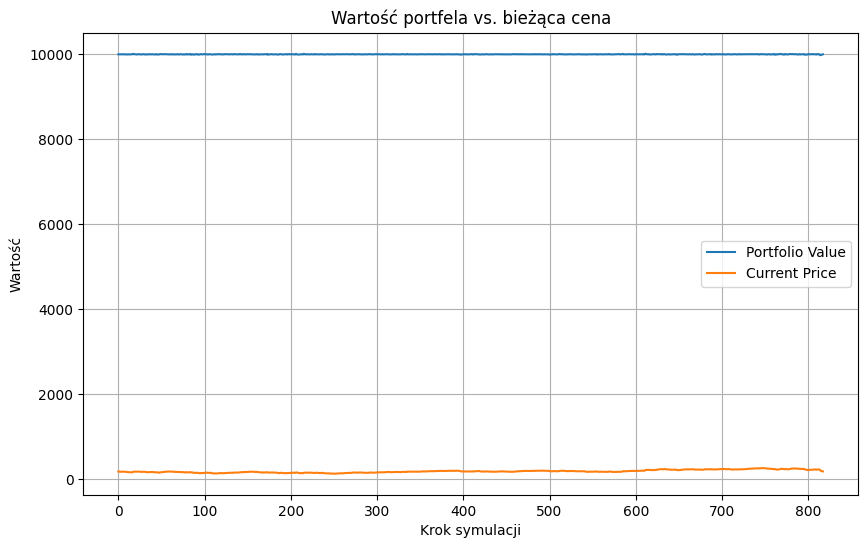

In [48]:
# reset ≈õrodowiska
obs = vec_env.reset()
done = [False]

# listy do gromadzenia wynik√≥w
portfolio_values = []
current_prices = []
previous_prices = []
steps = []

# pobieramy dostƒôp do faktycznego ≈õrodowiska (w ≈õrodku DummyVecEnv)
env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # agent decyduje o akcji
    action, _states = model_dqn.predict(obs, deterministic=True)

    # wykonanie akcji w ≈õrodowisku
    obs, reward, done, info = vec_env.step(action)

    # obliczamy bie≈ºƒÖcƒÖ warto≈õƒá portfela
    current_price = env_.df.loc[env_.current_step, 'Close']
    # je≈õli current_step == 0, ustalamy prev_price = current_price, by uniknƒÖƒá -1 w indeksie
    prev_price = (env_.df.loc[env_.current_step - 1, 'Close']
                  if env_.current_step > 0
                  else current_price)

    # Podstawowa logika z environmentu:
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # Zapisujemy do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    previous_prices.append(prev_price)
    steps.append(step_count)

    step_count += 1

# Wypisanie (opcjonalne) kilku warto≈õci
print("Kilka pierwszych rekord√≥w:")
for i in range(min(5, len(steps))):
    print(f"Step={steps[i]}, Prev={previous_prices[i]}, Curr={current_prices[i]}, Portfolio={portfolio_values[i]}")


plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Warto≈õƒá")
plt.title("Warto≈õƒá portfela vs. bie≈ºƒÖca cena")
plt.grid(True)
plt.legend()
plt.show()

In [49]:
min(portfolio_values), max(portfolio_values)

(np.float64(9980.119064331055), np.float64(10013.983016967773))

### **5.2.  Actor-Critic (A2C, A3C)**

Rozdzielenie funkcji akcji (policy) i oceny (critic)

**Actor:** Sieƒá/polityka *œÄŒ∏(a‚à£s)*, kt√≥ra bezpo≈õrednio decyduje o akcji w stanie s.

**Critic:** Sieƒá, kt√≥ra ocenia warto≈õci stanu (lub stanu-akcji). Informuje aktora, jak dobre by≈Çy wybierane akcje.

**A2C (Advantage Actor-Critic):**

Wariant, w kt√≥rym *Advantage = Q(s,a)‚àíV(s)* jest u≈ºywane do stabilniejszej aktualizacji polityki.

**A3C:**

Asynchronous Advantage Actor-Critic ‚Äì kilka agent√≥w trenuje siƒô r√≥wnolegle na r√≥≈ºnych kopiach ≈õrodowiska (zwykle przyspiesza trenowanie).





**Zalety:**

Bardziej efektywne i stabilniejsze uczenie w por√≥wnaniu do podstawowego DQN, szczeg√≥lnie przy problemach sekwencyjnych.

≈Åatwiejsze rozszerzanie na problemy z akcjami ciƒÖg≈Çymi (choƒá tu czƒô≈õciej u≈ºywa siƒô DDPG/SAC, niemniej Actor-Critic to og√≥lny framework).

Mo≈ºliwo≈õƒá r√≥wnoleg≈Çego trenowania (A3C) przyspiesza eksploracjƒô w wiƒôkszych problemach.

**Ograniczenia:**

WciƒÖ≈º mo≈ºe byƒá niestabilny w przypadku niestacjonarnych danych finansowych.

Wymaga odpowiedniej in≈ºynierii nagrody i normalizacji danych, aby polityka skutecznie siƒô uczy≈Ça.



**Przyk≈Çadowy kod z u≈ºyciem SB3 (A2C)**

Dokumentacja (https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html)

In [38]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

env = SimpleTradingEnv(df=some_financial_data)
vec_env = DummyVecEnv([lambda: env])

model_a2c = A2C(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=7e-4, # lr=0.0007
    n_steps=5,  # liczba krok√≥w przed aktualizacjƒÖ
    gamma=0.99,
    verbose=1
)

model_a2c.learn(total_timesteps=30000)


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 366      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.544   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -2.06    |
|    value_loss         | 6.58     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 369       |
|    iterations         | 200       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.509    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.3      |
|    val

Pierwsze rekordy rollout:
Step=0 | Prev=178.87991333007812 | Curr=176.60963439941406 | Portfolio=10000
Step=1 | Prev=176.60963439941406 | Curr=171.91183471679688 | Portfolio=10000
Step=2 | Prev=171.91183471679688 | Curr=169.04208374023438 | Portfolio=10000
Step=3 | Prev=169.04208374023438 | Curr=169.2091522216797 | Portfolio=10000
Step=4 | Prev=169.2091522216797 | Curr=169.22877502441406 | Portfolio=10000


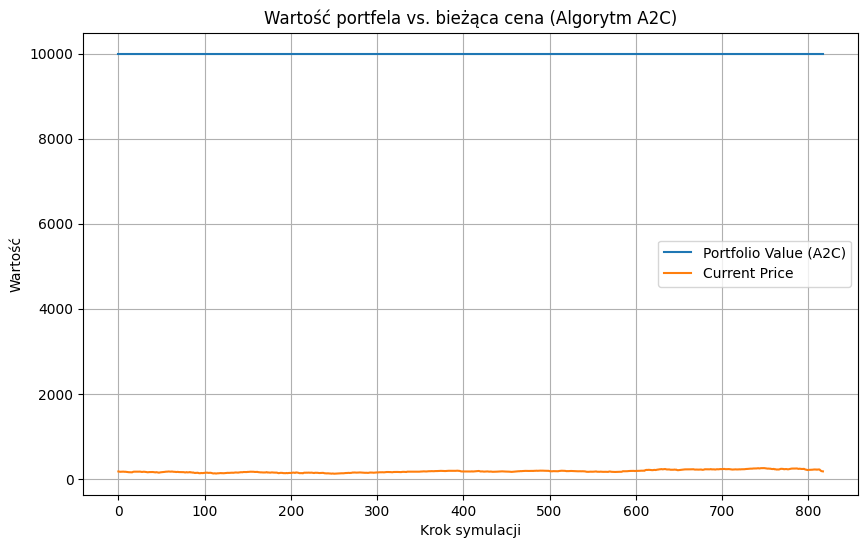

In [50]:
import matplotlib.pyplot as plt

# Reset ≈õrodowiska przed testowym "rolloutem"
obs = vec_env.reset()
done = [False]

# Listy do gromadzenia wynik√≥w
portfolio_values = []
current_prices = []
previous_prices = []
steps = []

# Uzyskujemy dostƒôp do faktycznego ≈õrodowiska (SimpleTradingEnv)
env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # Decyzja agenta (A2C) na podstawie bie≈ºƒÖcej obserwacji
    action, _states = model_a2c.predict(obs, deterministic=True)

    # Wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    # Pobieramy aktualnƒÖ i poprzedniƒÖ cenƒô
    current_price = env_.df.loc[env_.current_step, 'Close']
    prev_price = (env_.df.loc[env_.current_step - 1, 'Close']
                  if env_.current_step > 0
                  else current_price)

    # Wyliczamy bie≈ºƒÖcƒÖ warto≈õƒá portfela
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # Zapis do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    previous_prices.append(prev_price)
    steps.append(step_count)

    step_count += 1

# PodglƒÖd pierwszych kilku rekord√≥w
print("Pierwsze rekordy rollout:")
for i in range(min(5, len(steps))):
    print(f"Step={steps[i]} | Prev={previous_prices[i]} | "
          f"Curr={current_prices[i]} | Portfolio={portfolio_values[i]}")

plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (A2C)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Warto≈õƒá")
plt.title("Warto≈õƒá portfela vs. bie≈ºƒÖca cena (Algorytm A2C)")
plt.grid(True)
plt.legend()
plt.show()

### **5.3. PPO (Proximal Policy Optimization)**

Zbalansowanie miƒôdzy eksploracjƒÖ a stabilno≈õciƒÖ

**PPO** to algorytm Actor-Critic, kt√≥ry ogranicza, jak bardzo mo≈ºna zaktualizowaƒá politykƒô miƒôdzy kolejnymi krokami, aby uniknƒÖƒá gwa≈Çtownych zmian i zachowaƒá stabilno≈õƒá.

Mechanizm ‚Äûklipowania‚Äù (clipping): PPO ogranicza stosunek (ratio) nowej polityki do starej polityki, by unikaƒá nadmiernych skok√≥w w parametrach.


**Zalety:**

Stabilno≈õƒá uczenia ‚Äì mniejsze skoki w warto≈õci polityki w por√≥wnaniu z klasycznymi metodami policy gradient.

Dobra wydajno≈õƒá ‚Äì PPO jest czƒôsto u≈ºywanym algorytmem RL ‚Äûz pude≈Çka‚Äù do wielu zastosowa≈Ñ, w tym do strategii tradingowych.

≈Åatwo≈õƒá dostosowania ‚Äì mo≈ºna ≈Çatwo wstawiƒá niestandardowƒÖ funkcjƒô nagrody (premie za Sharpe Ratio, kary za drawdown).

**Ograniczenia:**

Wymaga do≈õƒá du≈ºych danych (epizod√≥w), aby wytrenowaƒá stabilnƒÖ politykƒô, zw≈Çaszcza w ≈õrodowiskach z rzadkimi nagrodami.

Hipotetyczna eksploracja w finansach mo≈ºe byƒá ograniczona, je≈õli agent uczy siƒô z danych historycznych ‚Äì realnie nie mamy ‚Äûalternatywnych wszech≈õwiat√≥w‚Äù rynkowych.


Dokumentacja: (https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

**Przyk≈Çadowy kod z u≈ºyciem SB3 (PPO)**

In [51]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

env = SimpleTradingEnv(df=some_financial_data)
vec_env = DummyVecEnv([lambda: env])

model_ppo = PPO(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=3e-4,  # lr ~0.0003
    n_steps=1024,        # liczba krok√≥w przed wykonaniem aktualizacji
    batch_size=64,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,       # Wsp√≥≈Çczynnik entropii -> wiƒôksza eksploracja
    verbose=1
)

model_ppo.learn(total_timesteps=30000)


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 559  |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 1024 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.009444961 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 8.27e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 25.7        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 47.9        |
-----------------------------------------
----------------

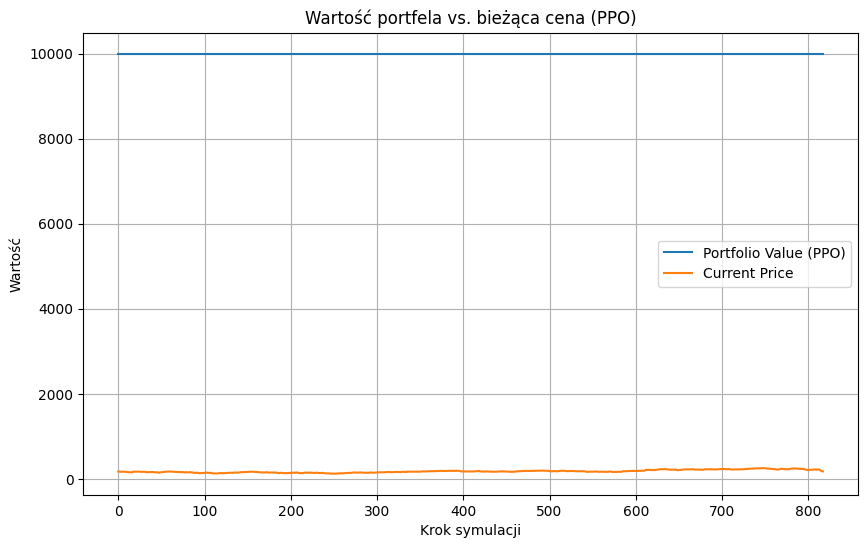

In [52]:
import matplotlib.pyplot as plt

# reset ≈õrodowiska przed "rolloutem"
obs = vec_env.reset()
done = [False]

portfolio_values = []
current_prices = []
steps = []

env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # agent wybiera akcjƒô
    action, _states = model_ppo.predict(obs, deterministic=True)

    # wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    # aktualna cena
    current_price = env_.df.loc[env_.current_step, 'Close']
    if env_.current_step > 0:
        prev_price = env_.df.loc[env_.current_step - 1, 'Close']
    else:
        prev_price = current_price

    # warto≈õƒá portfela = balance + ewentualny niezrealizowany zysk
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # zapis wynik√≥w do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    steps.append(step_count)

    step_count += 1

# wizualizacja
plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (PPO)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Warto≈õƒá")
plt.title("Warto≈õƒá portfela vs. bie≈ºƒÖca cena (PPO)")
plt.grid(True)
plt.legend()
plt.show()


### **5.4. DDPG (Deep Deterministic Policy Gradient) i SAC (Soft Actor-Critic)**


Szczeg√≥lnie przydatne w problemach ciƒÖg≈Çego podejmowania decyzji

Akcje ciƒÖg≈Çe: Zamiast ograniczaƒá siƒô do ‚Äûkup/sprzedaj/trzymaj‚Äù, mo≈ºna mieƒá przedzia≈Ç [‚àí1,1], kt√≥ry np. okre≈õla wielko≈õƒá pozycji.

**DDPG:**

≈ÅƒÖczy pomys≈Ç deterministycznego policy gradientu z replay bufferem (podobnie jak w DQN).

Uczy siƒô funkcji Q (Critic) i jednocze≈õnie polityki (Actor), kt√≥ra mapuje stany na akcje (w przestrzeni ciƒÖg≈Çej).

**SAC (Soft Actor-Critic):**

Zawiera element entropy maximization, kt√≥ry zachƒôca agenta do eksploracji.

Czƒôsto bardziej stabilny i odporny na zbieganie do lokalnych optimum w por√≥wnaniu z DDPG.



**Zalety:**

Elastyczno≈õƒá akcji: Mo≈ºna precyzyjnie kontrolowaƒá wielko≈õƒá pozycji, co w finansach jest bardzo naturalne (nie zawsze chcemy jedynie full-kupno lub full-sprzeda≈º).

Lepsza eksploracja (szczeg√≥lnie w SAC) ‚Äì wa≈ºna w kontek≈õcie niestacjonarnych rynk√≥w, gdzie agent musi ‚Äûtestowaƒá‚Äù r√≥≈ºne strategie.

Nowoczesne metody ‚Äì w literaturze czƒôsto wymieniane jako state-of-the-art w ciƒÖg≈Çych zadaniach kontrolnych (r√≥wnie≈º w robotyce).

**Ograniczenia:**

Wiƒôksza z≈Ço≈ºono≈õƒá implementacji (choƒá SB3 nam to u≈Çatwia).

Potrzeba wiƒôkszej liczby epizod√≥w w por√≥wnaniu do prostych metod (np. Q-learning).

Trudno≈õƒá w doborze hiperparametr√≥w (learning rate, wielko≈õƒá replay buffer, itp.).



Dokumentacja:
* DDPG (https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html)
* SAC (https://stable-baselines3.readthedocs.io/en/master/modules/sac.html)

**Przyk≈Çadowy kod z u≈ºyciem SB3 (SAC)**

W pierwszej kolejno≈õci przygotowujemy ≈õrodowisko (Gym), podobna implementacja do SimpleTradingEnv, ale z continuous action_space.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import gym
from gym import spaces
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv



class ContinuousTradingEnv(gym.Env):
    """
    Proste ≈õrodowisko do 'continuous action':
      - Akcje: [-1, 1] => short, long lub warto≈õci po≈õrednie.
      - Obserwacja: [aktualna_cena, saldo, pozycja].
      - Reward = przyrost kapita≈Çu (day-to-day),
        a na ko≈Ñcu epizodu = + (balance - initial_balance).
    """

    def __init__(self, df, initial_balance=10000):
        super(ContinuousTradingEnv, self).__init__()

        # Przyjmujemy, ≈ºe df ma jednƒÖ kolumnƒô 'Close' i indeks 0..N-1
        self.df = df.reset_index(drop=True).copy()
        self.initial_balance = float(initial_balance)

        # Akcja ciƒÖg≈Ça: [-1,1]
        self.action_space = spaces.Box(
            low=-1.0,
            high=1.0,
            shape=(1,),
            dtype=np.float32
        )

        # Obserwacja: [cena, saldo, pozycja]
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(3,),
            dtype=np.float32
        )

        self.reset()

    def _get_observation(self):
        price = self.df.loc[self.current_step, 'Close']
        return np.array([price, self.balance, self.position], dtype=np.float32)

    def step(self, action):
        """
        action: np.array o shape=(1,) z warto≈õciami w [-1,1],
                np. -1 = short, +1 = long, 0.3=30% long, itp.
        """
        # Cena poprzednia
        prev_price = self.df.loc[self.current_step, 'Close']

        self.current_step += 1
        done = (self.current_step >= len(self.df) - 1)

        # Cena bie≈ºƒÖca
        current_price = self.df.loc[self.current_step, 'Close']

        # Wyliczamy zysk: (r√≥≈ºnica cen) * action
        # Zak≈Çadamy 1 "kontrakt" * action
        profit = (current_price - prev_price) * action[0]
        self.balance += profit

        # Ustawienie pozycji (warto≈õƒá akcji)
        self.position = action[0]

        # Nagroda = bie≈ºƒÖcy przyrost kapita≈Çu
        reward = float(profit)

        # Na koniec epizodu: premia/kara za finalne saldo
        if done:
            reward += (self.balance - self.initial_balance)

        obs = self._get_observation()
        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0.0
        return self._get_observation()


In [61]:
df_raw = yf.download("AAPL", start="2022-01-01", end="2025-04-08", progress=False)

# Wybieramy tylko kolumnƒô "Close"
# Upewniamy siƒô, ≈ºe to nie MultiIndex
if isinstance(df_raw.columns, pd.MultiIndex):
    # sp≈Çaszczamy do 1 poziomu
    df_raw.columns = df_raw.columns.droplevel([i for i in range(1, df_raw.columns.nlevels)])

df_data = df_raw[["Close"]].copy().dropna()
df_data.reset_index(drop=True, inplace=True)

print("Rozmiar DF:", df_data.shape)
print(df_data.head())


Rozmiar DF: (818, 1)
Price       Close
0      178.879898
1      176.609650
2      171.911819
3      169.042038
4      169.209106


In [62]:
env = ContinuousTradingEnv(df=df_data, initial_balance=10000)
vec_env = DummyVecEnv([lambda: env])

model_sac = SAC(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=3e-4,
    buffer_size=30000,  # bufor
    batch_size=256,
    gamma=0.99,
    tau=0.02,
    ent_coef="auto",
    verbose=1
)

model_sac.learn(total_timesteps=20000)

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 81       |
|    time_elapsed    | 40       |
|    total_timesteps | 3268     |
| train/             |          |
|    actor_loss      | 3.33e+03 |
|    critic_loss     | 52.1     |
|    ent_coef        | 2.59     |
|    ent_coef_loss   | -30.3    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3167     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 82       |
|    time_elapsed    | 79       |
|    total_timesteps | 6536     |
| train/             |          |
|    actor_loss      | 8.96e+03 |
|    critic_loss     | 911      |
|    ent_coef        | 6.89     |
|    ent_coef_loss   | -61.6    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6435     |
---------------------------------
------------------------------

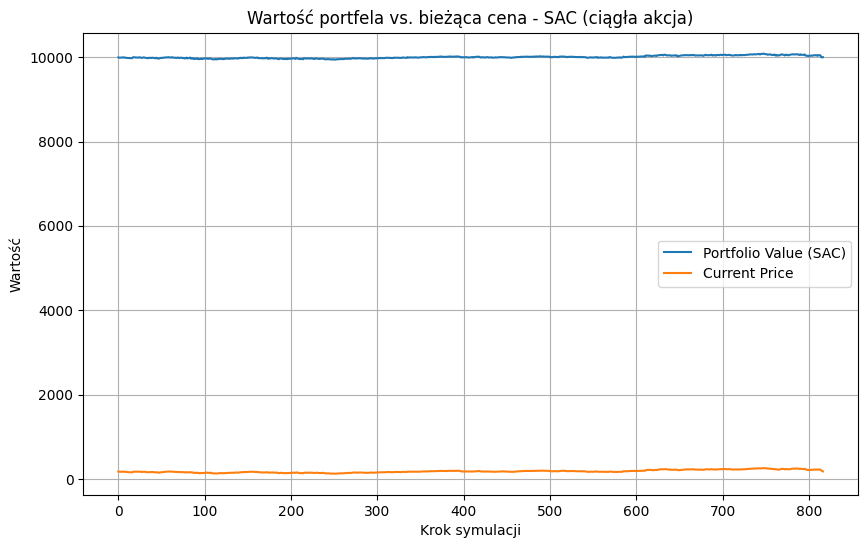

In [63]:
obs = vec_env.reset()
done = [False]

portfolio_values = []
current_prices = []
steps = []

env_ = vec_env.envs[0]
step_count = 0

while not done[0]:
    # Decyzja agenta
    action, _states = model_sac.predict(obs, deterministic=True)
    # Wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    current_price = env_.df.loc[env_.current_step, "Close"]
    if env_.current_step > 0:
        prev_price = env_.df.loc[env_.current_step - 1, "Close"]
    else:
        prev_price = current_price

    portfolio_value = env_.balance
    if abs(env_.position) > 1e-6:
        # Prosty day-to-day zysk
        portfolio_value += (current_price - prev_price) * env_.position

    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    steps.append(step_count)

    step_count += 1

# Rysowanie wykresu
plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (SAC)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Warto≈õƒá")
plt.title("Warto≈õƒá portfela vs. bie≈ºƒÖca cena - SAC (ciƒÖg≈Ça akcja)")
plt.grid(True)
plt.legend()
plt.show()

In [68]:
min(portfolio_values), max(portfolio_values), portfolio_values[:1]

(np.float64(9939.948501586914),
 np.float64(10081.963333129883),
 [np.float64(9995.459503173828)])

### **5.5. Por√≥wnanie algorytm√≥w**


```
| Algorytm | Typ akcji                                     | Kluczowe cechy                                                          | Stabilno≈õƒá        | Z≈Ço≈ºono≈õƒá |
|----------|-----------------------------------------------|-------------------------------------------------------------------------|-------------------|-----------|
|   DQN    | Dyskretne                                     | Proste do zrozumienia, skuteczne w ma≈Çych przestrzeniach akcji          | ≈örednia           | ≈örednia   |
| A2C/A3C  | Dyskretne (lub ciƒÖg≈Çe, z modyfikacjami)       | R√≥wnoleg≈Çe trenowanie, Actor-Critic                                     | ≈örednia / Dobra   | ≈örednia   |
|   PPO    | Dyskretne (i wersje ciƒÖg≈Çe)                   | Bardzo popularne, clipping ogranicza du≈ºe fluktuacje w polityce         | Wysoka            | ≈örednia   |
|   DDPG   | CiƒÖg≈Çe                                        | Deterministyczna polityka, replay buffer                                | Czasem wra≈ºliwy   | Wy≈ºsza    |
|   SAC    | CiƒÖg≈Çe                                        | Entropy maximization, stabilna i dobra eksploracja                      | Bardzo dobra      | Wy≈ºsza    |

```




**Najwa≈ºniejsze wnioski**

* Wyb√≥r algorytmu zale≈ºy od rodzaju akcji: DQN / PPO dla dyskretnych (kup, sprzedaj, trzymaj), DDPG / SAC dla ciƒÖg≈Çych (wielko≈õƒá pozycji).

* **Stabilno≈õƒá:** PPO i SAC uchodzƒÖ za bardziej stabilne algorytmy ni≈º choƒáby DQN w z≈Ço≈ºonych problemach.

* **Implementacja:** W praktyce warto skorzystaƒá z gotowych rozwiƒÖza≈Ñ (SB3, RLlib), zamiast pisaƒá wszystko od zera.

* **Wyzwania w finansach:** Niestacjonarno≈õƒá danych, rzadkie nagrody, du≈ºa wra≈ºliwo≈õƒá na outliers, konieczno≈õƒá regularnego retrainingu.

W kontek≈õcie optymalizacji portfela i strategii tradingowych, te algorytmy dajƒÖ szerokie mo≈ºliwo≈õci dynamicznego zarzƒÖdzania ryzykiem, testowania r√≥≈ºnych polityk inwestycyjnych i reagowania na zmiany rynkowe. Zanim jednak przejdzie siƒô do realnego wdro≈ºenia, nale≈ºy zadbaƒá o backtesting, testy out-of-sample oraz mechanizmy risk management (VaR, CVaR, drawdown).



---



## **6. Jak zbudowaƒá prosty model RL dla portfela (zarys)**

### **6.1. Definiowanie ≈õrodowiska**


Z perspektywy biblioteki typu Gym musimy zaimplementowaƒá:

* **observation_space**: co agent dostaje jako ‚Äûstan‚Äù z otoczenia (np. ceny historyczne, wska≈∫niki),

* **action_space**: jakie akcje mo≈ºe podjƒÖƒá agent (kup, sprzedaj, trzymaj ‚Äì lub w wersji bardziej zaawansowanej: r√≥≈ºne poziomy zaanga≈ºowania kapita≈Çu),

* **step(action)**: jak wyglƒÖda przej≈õcie w ≈õrodowisku po podjƒôciu akcji (aktualizacja portfela, naliczenie nagrody),

* **reset()**: inicjalizacjƒô ≈õrodowiska do stanu poczƒÖtkowego (np. poczƒÖtek okresu backtestu).



Przyk≈Çadowe dane wymagane przez model:

**Stany (states):**

Przyk≈Çadowo: [cena akcji w dniu dzisiejszym, 5-dniowa ≈õrednia kroczƒÖca, 10-dniowa ≈õrednia kroczƒÖca, wolumen, itp.].

Mo≈ºemy te≈º dodaƒá wska≈∫niki fundamentalne (np. P/E) lub nastrojowe (np. sentyment z social media), je≈õli mamy dane.

**Akcje (actions):**

Za≈Ç√≥≈ºmy 3 dyskretne dzia≈Çania: 0 = ‚Äûsprzedaj‚Äù, 1 = ‚Äûtrzymaj‚Äù, 2 = ‚Äûkup‚Äù.

W bardziej zaawansowanej wersji mo≈ºna pozwoliƒá na dzia≈Çania ciƒÖg≈Çe: [‚àí1,+1], gdzie -1 oznacza kr√≥tkƒÖ pozycjƒô, +1 pozycjƒô d≈ÇugƒÖ, a warto≈õci po≈õrednie to czƒô≈õciowa ekspozycja.

**Nagroda (reward):**

Podstawowy przyk≈Çad: zmiana warto≈õci portfela miƒôdzy kolejnymi krokami (daily PnL).

Mo≈ºemy wzbogaciƒá tƒô funkcjƒô nagrody np. o kary za du≈ºe obsuniƒôcia kapita≈Çu (drawdown) albo stosowaƒá Sharpe Ratio czy miary ryzyka (VaR, CVaR).

Poni≈ºej pokazany jest minimalny przyk≈Çad klasy ≈õrodowiska w stylu Gym (prezentowane w [punkcie 4.5](#scrollTo=4_5_Bazowe_rodowisko)):

In [ ]:
import gym
import numpy as np
from gym import spaces

class SimpleTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000):
        super(SimpleTradingEnv, self).__init__()

        # dane historyczne (w tym wypadku wykorzystujemy cenƒô 'Close' -> dane zdefiniowna na poczƒÖtku dokuemntu)
        self.df = df.reset_index(drop=True)

        # saldo poczƒÖtkowe
        self.initial_balance = initial_balance

        # definicja akcji: 3 akcje dyskretne (sprzedaj, trzymaj, kup)
        self.action_space = spaces.Discrete(3)

        # definicja obserwacji (stan√≥w)
        # w tym przyk≈Çadzie bƒôdzie to tablica: [cena, 5-dniowa SMA, 10-dniowa SMA, aktualny cash, aktualna pozycja] (ni≈ºej definicja)
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(5,),
            dtype=np.float32
        )

        self.reset()

    def _get_observation(self):
        # obliczamy 5-dniowƒÖ i 10-dniowƒÖ ≈õredniƒÖ kroczƒÖcƒÖ
        sma5 = self.df['Close'].rolling(5).mean().iloc[self.current_step]
        sma10 = self.df['Close'].rolling(10).mean().iloc[self.current_step]

        # tworzymy wektor obserwacji: [cena, SMA5, SMA10, posiadany kapita≈Ç, aktualna pozycja]
        obs = np.array([
            self.df.loc[self.current_step, 'Close'],
            sma5 if not np.isnan(sma5) else 0.0,
            sma10 if not np.isnan(sma10) else 0.0,
            self.balance,
            self.position
        ], dtype=np.float32)

        return obs

    def step(self, action):
        # zachowujemy poprzedniƒÖ cenƒô do wyliczenia zysku/straty
        prev_price = self.df.loc[self.current_step, 'Close']

        # aktualizujemy krok w czasie
        self.current_step += 1

        # sprawdzamy czy nie koniec danych
        done = (self.current_step >= len(self.df) - 1)

        # aktualna cena
        current_price = self.df.loc[self.current_step, 'Close']

        # obliczenie nagordy: zysku/straty w zale≈ºno≈õci od akcji
        reward = 0

        # okre≈õlenie akcji: mamy jednƒÖ sztukƒô aktywa na +1, -1 lub 0
        if action == 0:  # akcja "sprzedaj"
            if self.position == 1:
                # realizacja zysku/straty
                profit = (current_price - prev_price) * 1
                self.balance += profit
            self.position = 0

        elif action == 1:  # akcja "trzymaj"
            # je≈ºeli mamy pozycjƒô 1, zysk/strata jest ciƒÖg≈Ça
            # reward obliczamy przy kolejnym stepie
            pass

        elif action == 2:  # akcja "kup"
            if self.position == 0:
                # zak≈Çadamy kupno 1 sztuki po aktualnej cenie
                pass
            self.position = 1

        # je≈ºeli mamy otwartƒÖ pozycjƒô w danym kroku, zysk/strata to r√≥≈ºnica cen
        if self.position == 1:
            reward = (current_price - prev_price) * 1

        # TODO: mo≈ºna dodaƒá kary za du≈ºy drawdown, koszty transakcyjne, itp.
        # ....
        # ....

        # aktualizacja obserwacji
        obs = self._get_observation()

        # warto≈õƒá portfela: got√≥wka + ewentualny niezrealizowany PnL
        portfolio_value = self.balance
        if self.position == 1:
            portfolio_value += (current_price - prev_price)

        # ewentualny koniec epizodu
        if done:
            # mo≈ºemy dodaƒá niewielkƒÖ premiƒô/karƒô na koniec (np. ko≈Ñcowa warto≈õƒá portfela - initial_balance)
            reward += (portfolio_value - self.initial_balance)

        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0  # 1 - d≈Çuga pozycja, 0 - brak pozycji

        # aby prawid≈Çowo obliczyƒá rolling mean od poczƒÖtku, trzeba pominƒÖƒá pierwsze n-krok√≥w (pozostawiam na potrzebƒô prezentacji)
        return self._get_observation()


### **6.2. Konfiguracja i trening**

**Dane historyczne i preprocessing**

W praktyce dane pochodzƒÖ czƒôsto z baz danych lub serwis√≥w zewnƒôtrznych.

Bazujemy na danych w formacie DataFrame (pandas) z kolumnƒÖ Close, ewentualnie OHLCV (Open, High, Low, Close, Volume).

Dane mo≈ºemy wzbogaƒá o kolejne paramterym np dane z oreder book, czy w≈Çasne wska≈∫niki (obliczane wstƒôpnie np. za pomocƒÖ ta-lib lub pandas_ta).



**Implementacja treningu z SB3**

Zak≈Çadamy, ≈ºe mamy gotowe ≈õrodowisko SimpleTradingEnv (zdefinowane wcze≈õniej). Teraz mo≈ºna u≈ºyƒá Stable Baselines3 z algorytmem PPO:

In [ ]:
import pandas as pd
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# zak≈Çadamy, ≈ºe mamy plik CSV z kolumnƒÖ 'Date' i 'Close'
df = pd.read_csv("example_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

env = SimpleTradingEnv(df, initial_balance=10000)

# wekroeowy wraper dla SB3
vec_env = DummyVecEnv([lambda: env])

model = PPO(
    policy="MlpPolicy", # prosta sieƒá neuronowa (MLP) jako Actor
    env=vec_env,
    verbose=1,
    # model mo≈ºna rozszerzaƒá poprzez dodatkowe  hyperparametry,
    # np. learning_rate, gamma, batch_size, itd.
)

# Trening (np. 10k timesteps)
model.learn(total_timesteps=10000)

# Zapis modelu (opcjonalnie)
model.save("ppo_trading_model")


### **6.3. Backtesting i walidacja**

Po wytrenowaniu modelu chcemy sprawdziƒá, jak zachowuje siƒô agent na danych niewykorzystanych w treningu (tzw. out-of-sample test, walidacja).

3.1. Ocena na danych historycznych niewidocznych w treningu

Dzielimy dane: np. 70% danych do treningu, 30% do testu.

Tworzymy nowe ≈õrodowisko na danych testowych i ≈Çadujemy wytrenowany model PPO.

In [ ]:
# Setup danych: 70% train, 30% test
train_size = int(len(df) * 0.7)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# srodowisko treningowe
env_train = SimpleTradingEnv(df_train)
vec_env_train = DummyVecEnv([lambda: env_train])

# srodowisko testowe
env_test = SimpleTradingEnv(df_test)
vec_env_test = DummyVecEnv([lambda: env_test])

# trening
model = PPO("MlpPolicy", vec_env_train, verbose=1)
model.learn(total_timesteps=10000)

# testowanie
obs = vec_env_test.reset()
done, state = [False], None
rewards = []
portfolio_values = []

while not done[0]:
    action, state = model.predict(obs, state=state, deterministic=True)
    obs, reward, done, info = vec_env_test.step(action)
    rewards.append(reward[0])
    # mo≈ºna wyciƒÖgaƒá portfolio_value z info, je≈õli modyfikujemy step() w environment
    # tu przyk≈Çadowo portfolio_value jest zakodowane w obserwacjach (5 element to "balance + pozycja")

print("Suma nagrod (test):", np.sum(rewards))


 Sprawdzenie stabilno≈õci i adaptacyjno≈õci modelu

Wykres kapita≈Çu w czasie: sprawdzamy, czy agent rzeczywi≈õcie zarabia, czy minimalizuje straty w okresach spadkowych.

**Analiza kluczowych metryk:**

Cumulative Return, Drawdown, Sharpe Ratio, Sortino Ratio.

Mo≈ºna te≈º wstawiƒá w funkcjƒô nagrody parametry zwiƒÖzane z ryzykiem, np. VaR czy CVaR.



**Przyk≈Çadowe miary do analizy**

In [ ]:
import numpy as np

def sharpe_ratio(returns, risk_free_rate=0.00):
    # dla uproszczenia: returns w ujƒôciu dziennym
    # r = mean(returns - risk_free) / std(returns)
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / (np.std(excess_returns) + 1e-9)

def max_drawdown(cumulative_returns):
    # cumulative_returns to np. np.cumsum(returns) lub warto≈õƒá portfela
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return np.min(drawdown)

# Sharpe Ratio i Max Drawdown po zebraniu serii dziennych zwrot√≥w
sr = sharpe_ratio(returns)
mdd = max_drawdown(cumulative_returns)
print(f"Sharpe Ratio: {sr:.2f}, Max Drawdown: {mdd:.2%}")


Uwaga: Kod powy≈ºej to jedynie przyk≈Çad. Zale≈ºnie od sposobu liczenia returns i cumulative_returns trzeba go dostosowaƒá do swojego ≈õrodowiska i sposobu przechowywania wynik√≥w.

### **6.5. Wyzwania i ograniczenia**


* **Ryzyko overfittingu** Przy zbyt jednoronycm zestawie danych lub zbyt ma≈Çym zestawie paramter√≥w model mo≈ºe zbyt dobrze dopasowaƒá siƒô do specyficznych danych historycznych, nie radzƒÖc sobie na danych rzeczywistych (out-of-sample).

* **Konieczno≈õƒá test√≥w w realnych warunkach rynkowych** Nawet najlepszy backtest nie gwarantuje sukcesu na ≈ºywo, poniewa≈º rynki sƒÖ niestacjonarne i czƒôsto zaskakujƒÖ. Dodatkowo w takim wypadku trzeba uwzglƒôdniƒá koszty transakcyjne (prowizje, spready), slippage, szybko≈õƒá egzekucji zlece≈Ñ.

* **Skala i czas** Je≈õli strategia ma dzia≈Çaƒá w kr√≥tkim horyzoncie (np. day trading, HFT), konieczne mogƒÖ byƒá bardziej szczeg√≥≈Çowe dane (tick data, order book), co komplikuje proces i wymaga wiƒôkszej mocy obliczeniowej. Dodatkowo w przypadku HFT warto poszukaƒá metod na optymalizacjƒô szybko≈õci dzia≈Çania modelu.

* **Zale≈ºno≈õƒá od definicji nagrody** Zale≈ºlnie od funkcji nagrody (premie za stabilno≈õƒá, drawdown, w≈ÇƒÖczenie ryzyka), takƒÖ politykƒô agent wypracuje. ≈πle zaprojektowana nagroda mo≈ºe prowadziƒá do niepo≈ºƒÖdanych zachowa≈Ñ (np. zbyt agresywnego ryzykowania).


### **6.4. Podsumowanie i dalsze kroki**

Kr√≥kie podsumowanie:

* **Agent ‚Äì ≈örodowisko ‚Äì Nagroda** to schemat w jakmi poruszamy siƒô modelu RL.

* **Funkcja nagrody** to kluczowy element w RL, w kontek≈õcie finans√≥w uwzglƒôdniajƒÖcy profit/loss, Sharpe Ratio, czy nawet Value-at-Risk (jako karƒô za zbyt du≈ºe ryzyko).

* **Weryfikacja modeli** backtest i test out-of-sample to podstawowy i najprostrzy element pozwalajƒÖcy oceniƒá strategiƒô inwestycyjnjƒÖ

* **Wyzwania** niestacjonarno≈õƒá rynku, rzadkie nagrody (zyski/straty), konieczno≈õƒá ciƒÖg≈Çej adaptacji modelu w czasie.



---



## **7. Podsumowanie i wnioski praktyczne**

### **7.1. Zalety RL w inwestycjach**

**Adaptacyjno≈õƒá**

Reinforcement Learning potrafi ‚Äûuczyƒá siƒô‚Äù z dynamicznie zmieniajƒÖcych siƒô warunk√≥w rynkowych, aktualizujƒÖc optymalnƒÖ politykƒô (policy) na podstawie otrzymywanej nagrody/straty.

Je≈ºeli zmienia siƒô re≈ºim rynkowy (np. z trendu wzrostowego na trend boczny lub spadkowy), klasyczny model statystyczny mo≈ºe wymagaƒá przebudowy. Agent RL, odpowiednio zaprojektowany, bƒôdzie ‚Äûdostrajaƒá siƒô‚Äù w trakcie kolejnych krok√≥w uczenia online lub w regularnych sesjach retrainingu.


**Modyfikacja funkcji nagrody (dowolne kryterium skuteczno≈õci)**


W RL mamy swobodƒô definiowania tego, co uznajemy za ‚Äûnagrodƒô‚Äù. Mo≈ºemy u≈ºyƒá klasycznego zysku, ale te≈º uwzglƒôdniƒá dodatkowe aspekty, np. drawdown, VaR, CVaR, Sharpe Ratio, Sortino Ratio i inne miary ryzyka.

Je≈õli chcemy skupiƒá siƒô na stabilnym zwrocie z ograniczeniem ryzyka, mo≈ºemy skonstruowaƒá funkcjƒô nagrody, kt√≥ra premiuje wysokie Sharpe Ratio oraz jednocze≈õnie nak≈Çada karƒô za przekroczenie za≈Ço≈ºonej granicy Value-at-Risk.


### **7.2. Ograniczenia i ≈õrodki zapobiegawcze**

**Potencjalnie wysokie ryzyko overfittingu**

Modele RL, podobnie jak inne algorytmy uczenia maszynowego, mogƒÖ dopasowaƒá siƒô zbyt mocno do konkretnych warunk√≥w wystƒôpujƒÖcych w danych historycznych.

Objawy to np ≈õwietne wyniki na danych treningowych, ale s≈Çabe na danych testowych lub rzeczywistych. Innym przyk≈Çadem jest rozbudowana architektura sieci neuronalnej (bardzo du≈ºa pojemno≈õƒá modelu) wytrenowana na ograniczonym zestawie danych.

Mo≈ºna temu zapobiec poprzez rygorystyczny backtest i walidacja krzy≈ºowa (np. walk-forward analysis) ‚Äì dzielimy dane na liczne segmenty czasowe, trenujemy i testujemy na przesuwajƒÖcym siƒô oknie.

Dodatkowo konieczne sƒÖ regularne testy out-of-sample ‚Äì sprawdzamy model na danych, kt√≥rych agent nigdy nie ‚Äûwidzia≈Ç‚Äù w trakcie treningu.

Regularny retraining ‚Äì co jaki≈õ czas od nowa uczymy agenta na nowszym wycinku danych.



**Niestabilno≈õƒá w ekstremalnych warunkach rynkowych (np. nag≈Çe krachy)**

Rynki sƒÖ niestacjonarne i okresowo pojawiajƒÖ siƒô skrajne zdarzenia (np. pandemie, wojny, flash crash). RL mo≈ºe mieƒá trudno≈õƒá z przewidzeniem tych zdarze≈Ñ, je≈õli w danych historycznych by≈Çy one rzadkie lub nieobecne.

Agent mo≈ºe podejmowaƒá zbyt agresywne decyzje inwestycyjne w okresach normalnych, co w sytuacjach ekstremalnych prowadzi do du≈ºych strat.

Brak danych treningowych odzwierciedlajƒÖcych ‚Äûczarne ≈Çabƒôdzie‚Äù (black swans).

Czƒô≈õciowo mo≈ºna zdiagnozowaƒá lub zminilizowaƒá problem poprzez wprowadzenie scenariuszy stress testingowych ‚Äì symulacja krachu rynkowego i obserwacja zachowania agenta.

Dodatkowo konieczne jest uwzglƒôdnienie miar ryzyka w nagrodzie (np. Value-at-Risk, Expected Shortfall/CVaR).

Niezmiennie jednak regularna obserwacja (wprowadzenie mechanizm√≥w okre≈õlajƒÖcych aktualny re≈ºim/stan) kontekstu rynkowego ‚Äì je≈õli wystƒôpujƒÖ oznaki wiƒôkszego ryzyka, mo≈ºna prze≈ÇƒÖczaƒá model w tryb konserwatywny lub wywo≈Çywaƒá czƒôstszy retraining.

### **7.3. Wskaz√≥wki wdro≈ºeniowe**

**CiƒÖg≈Ça walidacja i monitoring modelu**

Model RL, zw≈Çaszcza ten wdra≈ºany w realnych warunkach rynkowych, mo≈ºe siƒô ‚Äûrozjechaƒá‚Äù w wyniku zmiany re≈ºimu rynkowego. Istotne jest, by stale ≈õledziƒá kluczowe metryki (np. drawdown, zysk, liczba transakcji, eksploracja vs eksploatacja) i reagowaƒá w porƒô na negatywne trendy.

Dobrym pomys≈Çem jest oczywi≈õcie budowa dashboardu do monitoringu w czasie rzeczywistym (np. z wykorzystaniem narzƒôdzi typu Plotly Dash, Streamlit, czy narzƒôdzi BI).


**CiƒÖg≈Ça aktualizacja danych i retrain, testy out-of-sample**

Ze wzglƒôdu na niestacjonarno≈õƒá rynku, model RL powinien byƒá okresowo od≈õwie≈ºany nowymi danymi.

**Przyk≈Çadowy cykl pracy:**

1. Cotygodniowe od≈õwie≈ºenie modelu - retraining to uzupe≈Çnionym setupie danych
2. Backtesting i wdtro≈ºenie w ≈õrodowusku staginowym
3. Praca r√≥wnoleg≈Ça (na sucho) z aktualnie dzia≈ÇajƒÖcym modelem, na danych rynkowych,
4. W przypadku lepszych wynik√≥w, prze≈ÇƒÖczenie modeli

**Metodyki pracy:**

Rolling window ‚Äì przesuwajƒÖce siƒô okno danych (np. ostatnie 2 lata do treningu, a poprzednie tygodnie do testu).

Walk-forward optimization ‚Äì podzia≈Ç danych na segmenty czasowe (np. 6 miesiƒôcy trening, 1 miesiƒÖc testu, potem przesuwasz i powtarzasz).



---



## **8. Czas na dyskusjƒô**

...



---



## **9. Lista ≈∫r√≥de≈Ç, materia≈Çy i linki**

### **9.1. KsiƒÖ≈ºki i publikacje**



**Podstawy RL**

* ‚ÄûReinforcement Learning: An Introduction‚Äù ‚Äì Richard S. Sutton, Andrew G. Barto, MIT Press
* ‚ÄûAlgorithms for Reinforcement Learning‚Äù ‚Äì Csaba Szepesv√°ri

**RL w Finansach / Machine Learning w Tradingu**

* ‚ÄûMachine Learning for Algorithmic Trading‚Äù ‚Äì Stefan Jansen, Packt
* ‚ÄûAdvances in Financial Machine Learning‚Äù ‚Äì Marcos L√≥pez de Prado


**Bardziej zaawansowane tematy RL**

* ‚ÄûDeep Reinforcement Learning‚Äù ‚Äì Yuxi Li (Springer)
* ‚ÄûMulti-Agent Reinforcement Learning: State of the Art‚Äù ‚Äì Busoniu, Babuska, De Schutter


### **9.2. Artyku≈Çy naukowe i portale z publikacjami**

* arXiv.org - Najnowsze badania RL, ML i finans√≥w (https://arxiv.org/)

* SSRN (Social Science Research Network) - Baza  artyku≈Ç√≥w nt. technik ML w finansach, bada≈Ñ empirycznych, modeli ryzyka (https://www.ssrn.com/) (https://papers.ssrn.com/)

* IEEE Xplore - artyku≈Çy konferencyjne i czasopisma naukowe dotyczƒÖce AI, ML, RL (https://ieeexplore.ieee.org/)
* The Evolution of Reinforcement Learning in Quantitative Finance (https://arxiv.org/html/2408.10932v1)

### **9.3. Blogi, portale i spo≈Çeczno≈õci**



* Medium ‚Äì tag: Reinforcement Learning (https://medium.com/tag/reinforcement-learning)

* Reddit /r/reinforcementlearning (https://www.reddit.com/r/reinforcementlearning/)

* QuantStart - (https://www.quantstart.com/)

* Kaggle - (https://www.kaggle.com/)

* OpenAI Blog - (https://openai.com/blog/) (https://spinningup.openai.com/en/latest/)

### **9.4. Biblioteki i narzƒôdzia do RL**

* Stable Baselines3 (SB3) (https://stable-baselines3.readthedocs.io/en/master/)
* Ray RLlib - Dokumentacja (https://docs.ray.io/en/latest/rllib/index.html)
* Gym / Gymnasium (https://gym.openai.com/)
* Tianshou (https://github.com/thu-ml/tianshou)
* ACME (DeepMind) (https://dm-acme.readthedocs.io/en/latest/)
* Coach (Intel) (https://github.com/IntelLabs/coach)
* Optuna (https://optuna.org/)
* Hyperopt (https://hyperopt.github.io/hyperopt/)
* Keras RL (https://github.com/keras-rl/keras-rl)
* TF-agents (https://github.com/tensorflow/agents)
* Mushroom RL (https://mushroomrl.readthedocs.io/en/latest/)


### **9.5. Biblioteki i narzƒôdzia do pracy z danymi finansowymi**


* Gym-anytrading - Gotowe ≈õrodowiska RL do tradingu, kompatybilne z Gym (https://github.com/AminHP/gym-anytrading)

* Backtesting.py - Nieskomplikowana biblioteka do backtest√≥w strategii (daje te≈º pewnƒÖ elastyczno≈õƒá do integracji z RL) (https://kernc.github.io/backtesting.py/)

* Zipline - Silnik do backtest√≥w (wykorzystywany m.in. przez Quantopian), mo≈ºna zintegrowaƒá z RL (https://github.com/quantopian/zipline)

* Vectorbt - Zaawansowane narzƒôdzie do backtest√≥w w stylu wektorowym, integracja z Pandas i NumPy (https://vectorbt.dev/)

* PyPortfolioOpt - Optymalizacja portfela (klasyczne metody: Markowitz, risk parity, itp.)  (https://pyportfolioopt.readthedocs.io/en/latest/)

### **9.6. Zaawansowane obszary RL w finansach**


* Offline RL (Batch RL) - Zamiast trenowaƒá online, mamy du≈ºy zbi√≥r historycznych danych (np. z transakcjami) i chcemy wytrenowaƒá agenta. Czƒôsto u≈ºyteczne w finansach, gdzie symulacja jest kosztowna i musimy bazowaƒá na historycznych rekordach. D4RL: Datasets for Deep Data-Driven Reinforcement Learning (https://github.com/Farama-Foundation/D4RL)

* Meta-RL - RL, kt√≥ry uczy siƒô ‚Äûjak siƒô uczyƒá‚Äù ‚Äì przydatne w niestacjonarnych ≈õrodowiskach. (https://arxiv.org/abs/2004.05439)

* Hierarchical RL (HRL) Dzieli zadanie na podzadania (np. zarzƒÖdzanie portfelem mo≈ºe byƒá rozbite na sub-strategie). (https://arxiv.org/abs/1805.08296)

* Multi-Agent RL (MARL) Gdy rozwa≈ºamy wielu uczestnik√≥w rynku (market makerzy, arbitra≈ºy≈õci) w interakcji, mo≈ºemy badaƒá MARL. (https://arxiv.org/abs/2312.10256)

* Distributional RL - Du≈ºa przydatno≈õƒá w finansach, gdzie kluczowe jest rozumienie ryzyka i ekstrem√≥w (ogon rozk≈Çadu). (https://arxiv.org/abs/1707.06887)

* Risk-Sensitive / Constrained RL - Wbudowywanie limit√≥w ryzyka (np. VaR, CVaR) w algorytm RL ‚Äì tzw. CRL (Constrained RL). (https://arxiv.org/abs/1810.09126)



---

